In [40]:
import os
from utilities import preprocessDICOM
import numpy as np
import matplotlib.pyplot as plt
import re
from utilities import utilities

In [23]:
path2dcm = '../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/'
outputdir = './testnumpy/'

In [24]:
post_path = []
pre_path = []
for i,j,_ in os.walk(path2dcm, topdown=False):
    if len(j) > 0:
        for k in j:
            x = k.find("Post")
            if x != -1:
                post_path.append(os.path.join(i,k))
            x = k.find("Pre")
            if x != -1:
                pre_path.append(os.path.join(i,k))
path2pre_only_dcm = '../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/'
pre_only_path = []
for i,j,_ in os.walk(path2pre_only_dcm, topdown=False):
    if len(j) > 0:
        pre_only_path.append(os.path.join(i,j[0]))
pre_only_path.pop(-1)
[pre_path.append(p) for p in pre_only_path]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [25]:
pre_only_path[0]

'../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/166845/Pre_CT'

In [26]:
crn = re.findall("(\/)([\d*]{6})(\/)", pre_path[0])[0][1]
crn

'198333'

In [31]:
post_path[0]

'../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/198333/Post'

In [28]:
len(pre_path)
#len(pre_only_path)

211

In [33]:
def convert(path):
    DoneFiles = []
    NotDoneFiles = []
    for k in range(len(path)):
        path2Rtstr = []
        crn = re.findall("(\/)([\d*]{6})(\/)", path[k])[0][1]
        for i in os.listdir(path[k]):
            if 'RS' in i:
                path2Rtstr.append(i)
        RTstrPath = os.path.join(path[k],path2Rtstr[0])
        DICOMpath = path[k]
        fname = outputdir + crn + '.npy'
        print(RTstrPath)
        try:
            img = preprocessDICOM.preprocess(DICOMpath,RTstrPath,zero=False,norm=False, str_names=["gtv_1", "gtv__1"])  
            if img is None:
                print("Failed")
                img = None
            else:
                np.save(fname,img)
                plt.imshow(img[:,:,32])
                plt.show()
                print(f'{fname} Cropped Successfully')
                DoneFiles.append(fname)
        except:
            print(f'Could not Convert -- {fname} on path: {path}')
            NotDoneFiles.append(fname)
    return DoneFiles, NotDoneFiles        
        

../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/198333/Pre/RS.1.2.246.352.205.5598034673896617442.11997864620399622820.dcm
Structure: gtv_1 found


/Users/chufal/projects/QARCutilities/utilities/preprocessDICOM.py:158: RuntimeWarning: Mean of empty slice.
  coords.append([np.round(x_val_arr.mean()), np.round(y_val_arr.mean()), np.round(z_val_arr.mean())])
/opt/miniconda3/envs/qrcutilities/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


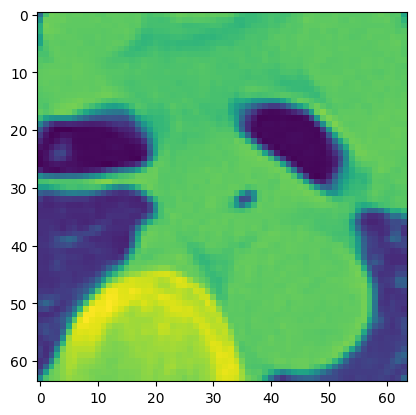

./testnumpy/198333.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/270102/Pre/RS.1.2.246.352.205.4825309266707123971.15954734267793842099.dcm
Structure: gtv_1 found


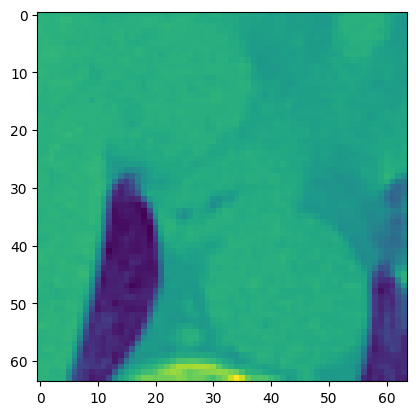

./testnumpy/270102.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/198750/Pre/RS.1.2.246.352.205.5640242385790700012.12250361215253787326.dcm
Structure: gtv_1 found


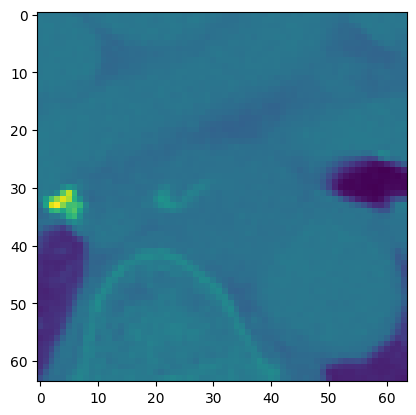

./testnumpy/198750.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/252864/Pre/RS.1.2.246.352.205.5111855669856210529.12766219934706235025.dcm
Structure: gtv_1 found


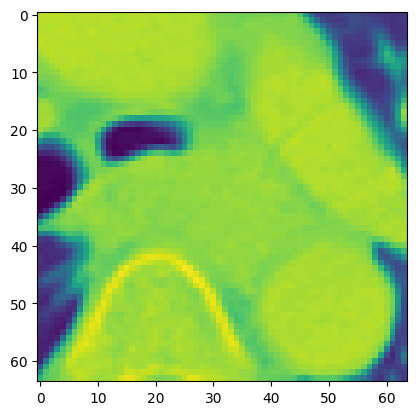

./testnumpy/252864.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/228623/Pre/RS.1.2.246.352.205.5663031557222860565.3141713389427552688.dcm
Structure: gtv_1 found


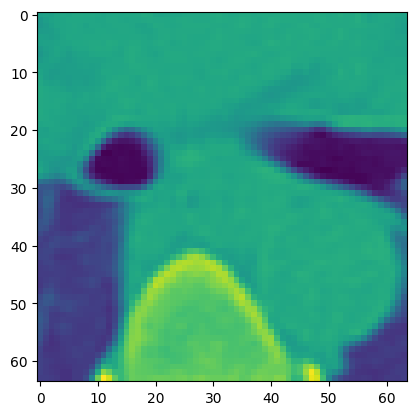

./testnumpy/228623.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/129143/Pre_CT/RS.1.2.246.352.205.5457856289384605800.10807988399639799197.dcm
Structure: gtv__1 found


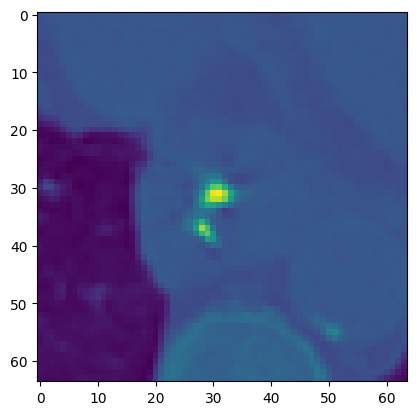

./testnumpy/129143.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/260194/Pre/RS.1.2.246.352.205.5365334794597864822.15044967990689581965.dcm
Structure: gtv_1 found


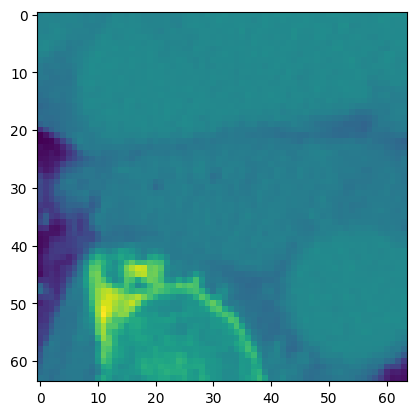

./testnumpy/260194.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/203264/Pre/RS.1.2.246.352.205.4996996022834921750.13656476909390091401.dcm
Structure: gtv_1 found


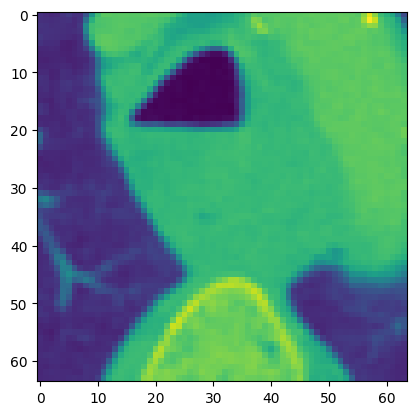

./testnumpy/203264.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/133673/Pre/RS.1.2.246.352.205.5283917176198727666.18073495223352118952.dcm
Structure: gtv_1 found


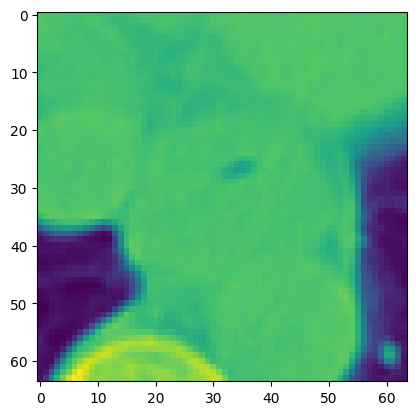

./testnumpy/133673.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/158510/Pre/RS.1.2.246.352.205.5437597333978332897.17798702890837716873.dcm
Structure: gtv__1 found


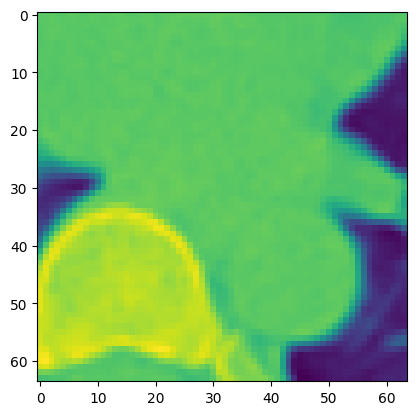

./testnumpy/158510.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/207809/Pre/RS.1.2.246.352.205.5413684686428315704.16109967965050005150.dcm
Structure: gtv__1 found


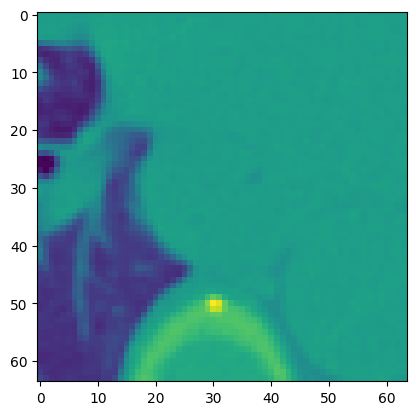

./testnumpy/207809.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/138605/Pre_CT_10mm/RS.1.2.246.352.71.4.513149349817.233730.20200513012134.dcm
Structure: gtv_1 found


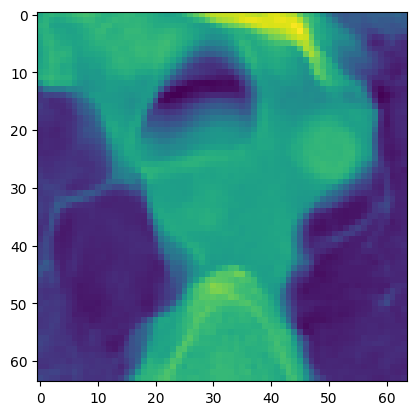

./testnumpy/138605.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/247718/Pre/RS.1.2.246.352.205.4925870886059325050.13839305394541628064.dcm
Structure: gtv_1 found


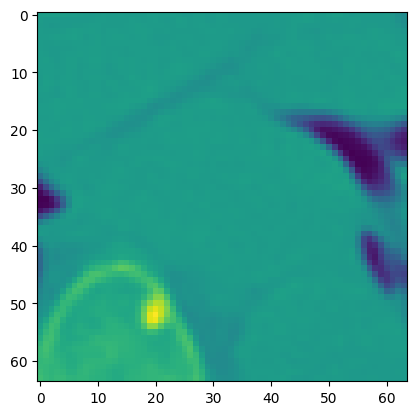

./testnumpy/247718.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/132300/Pre_CT/RS.1.2.246.352.205.4631984892661002086.10382440235722570646.dcm
Structure: gtv_1 found


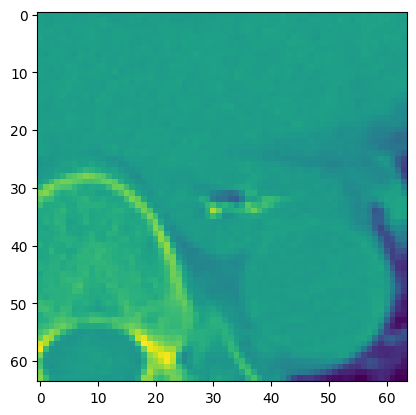

./testnumpy/132300.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/205962/Pre/RS.1.2.246.352.205.5269992416769458208.13085606341561987475.dcm
Structure: gtv_1 found


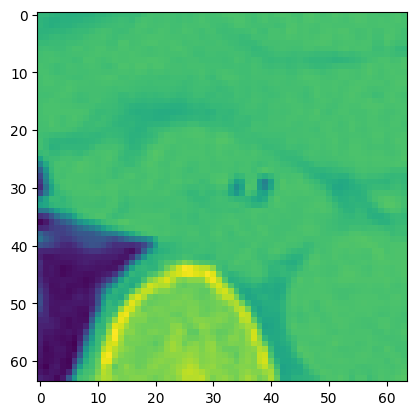

./testnumpy/205962.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/278732/Pre/RS.1.2.246.352.205.5408242884014050814.9027662912008128134.dcm
Structure: gtv_1 found


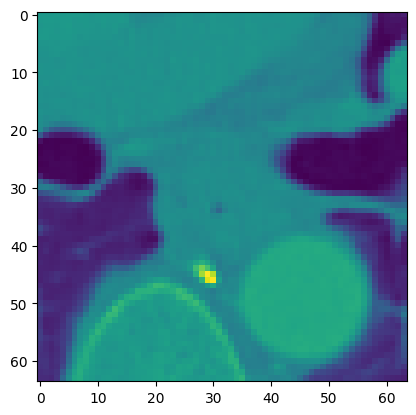

./testnumpy/278732.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/249849/Pre/RS.1.2.246.352.205.5322548687939281699.7855738735960973240.dcm
Structure: gtv_1 found


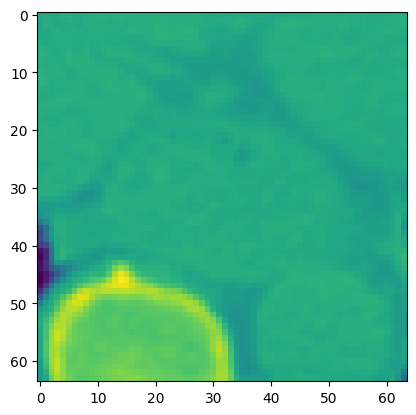

./testnumpy/249849.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/209597/Pre/RS.1.2.246.352.205.5272315823175867298.10047905870142123945.dcm
Structure: gtv_1 found


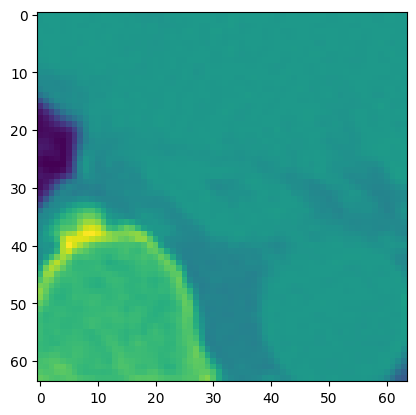

./testnumpy/209597.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/157355/Pre/RS.1.2.246.352.205.5170200073892710504.14169885440262982287.dcm
Structure: gtv_1 found


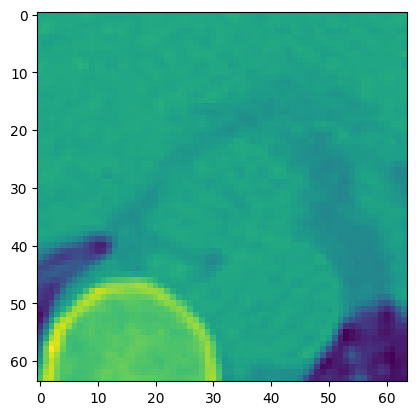

./testnumpy/157355.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/206311/Pre/RS.1.2.246.352.205.5490983503362718410.8690113957427102091.dcm
Structure: gtv_1 found


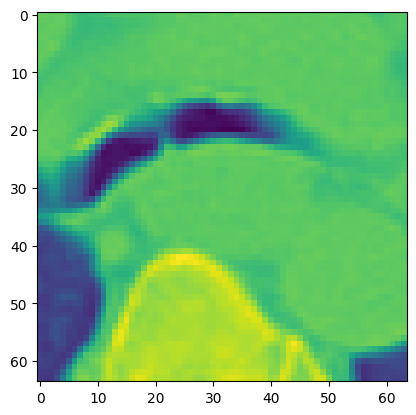

./testnumpy/206311.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/249648/Pre/RS.1.2.246.352.205.4901870097938462861.17005553399792190355.dcm
Structure: gtv_1 found


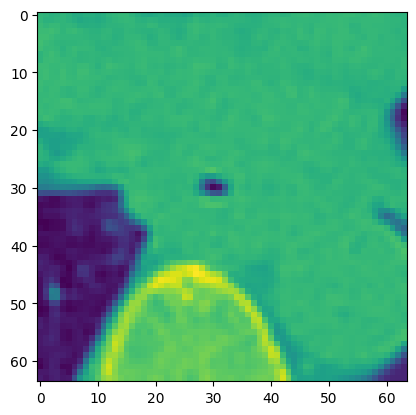

./testnumpy/249648.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/184391/Pre_RTP_5mm/RS.1.2.246.352.205.5159435005656217477.6097714578297941937.dcm
Structure: gtv__1 found


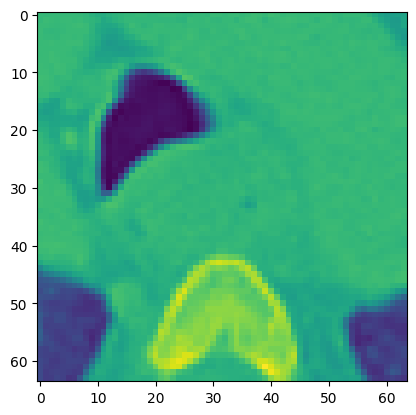

./testnumpy/184391.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/172242/Pre/RS.1.2.246.352.205.4946570936007868794.16241318843155720095.dcm
Structure: gtv__1 found


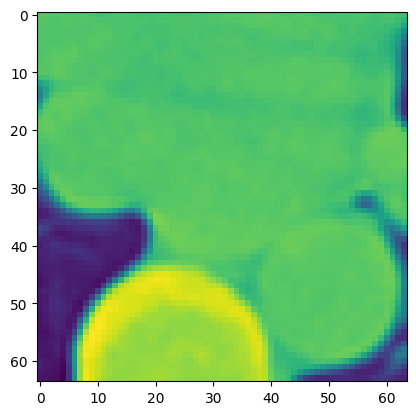

./testnumpy/172242.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/165945/Pre/RS.1.2.246.352.205.5388474127594377346.8700180071100934016.dcm
Structure: gtv__1 found


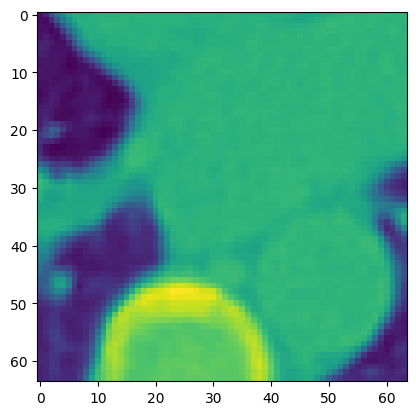

./testnumpy/165945.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/155718/Pre/RS.1.2.246.352.205.5086631204885967365.12904293711015263622.dcm
Structure: gtv_1 found


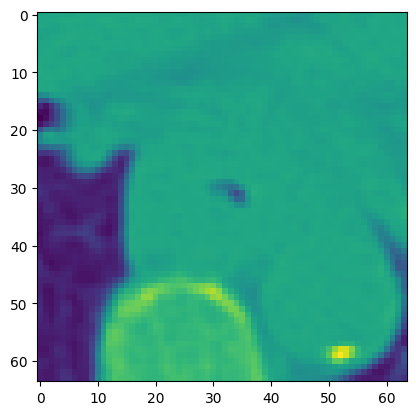

./testnumpy/155718.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/205047/Pre/RS.1.2.246.352.205.4708608677900047085.5264369069373609877.dcm
Structure: gtv_1 found


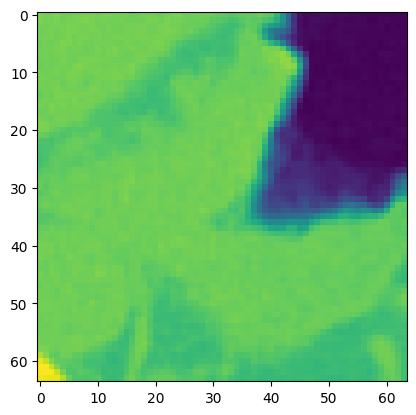

./testnumpy/205047.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/267253/Pre/RS.1.2.246.352.205.4842724419359490551.6150719776280030360.dcm
Structure: gtv_1 found


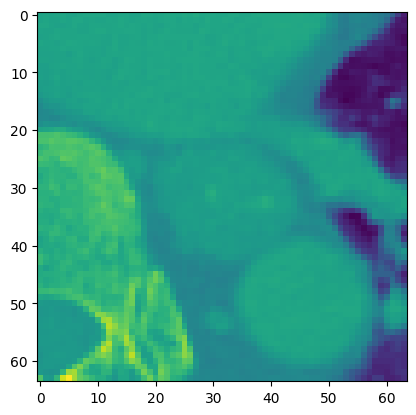

./testnumpy/267253.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/198822/Pre/RS.1.2.246.352.205.4671683412751193665.16070667244184463288.dcm
Structure: gtv_1 found


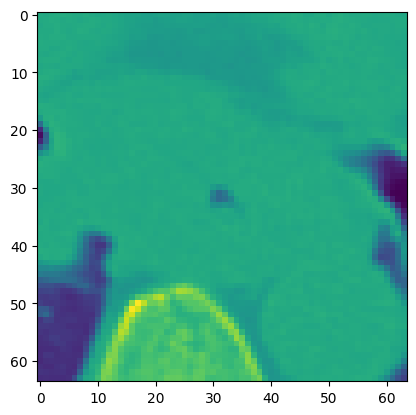

./testnumpy/198822.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/125005/Pre/RS.1.2.246.352.205.5737950907824091218.17533632636839684752.dcm
Structure: gtv_1 found


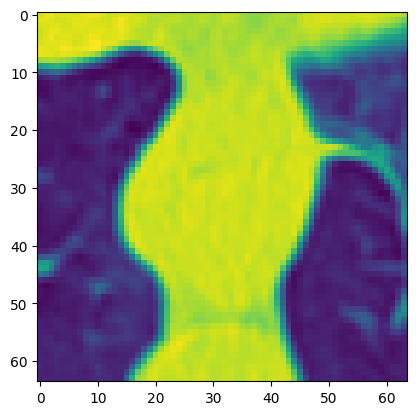

./testnumpy/125005.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/220701/Pre/RS.1.2.246.352.205.5325560212406344448.6469416493238603669.dcm
Structure: gtv_1 found


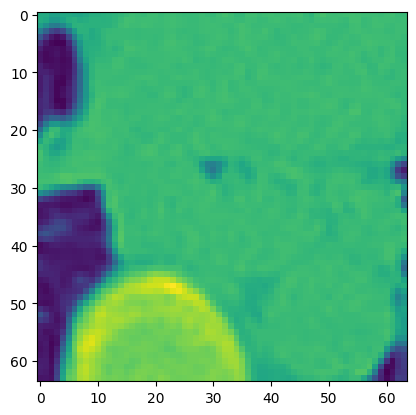

./testnumpy/220701.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/126627/Pre/RS.1.2.246.352.205.4837375593786232331.9860479644046904463.dcm
Structure: gtv_1 found


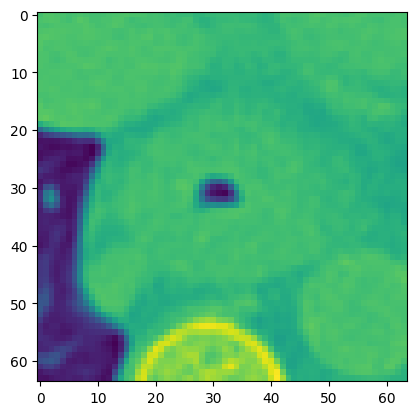

./testnumpy/126627.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/273890/Pre/RS.1.2.246.352.205.5041062312337759492.6731644208007537281.dcm
Structure: gtv_1 found


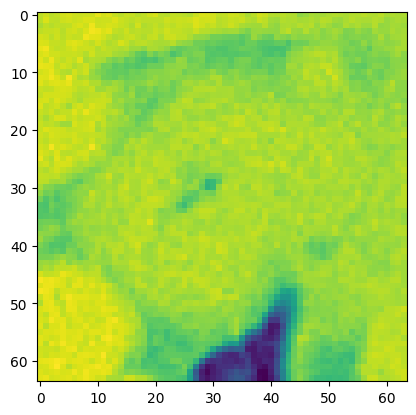

./testnumpy/273890.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/186373/Pre/RS.1.2.246.352.205.4651554228617713911.7630392186436462479.dcm
Structure: gtv__1 found


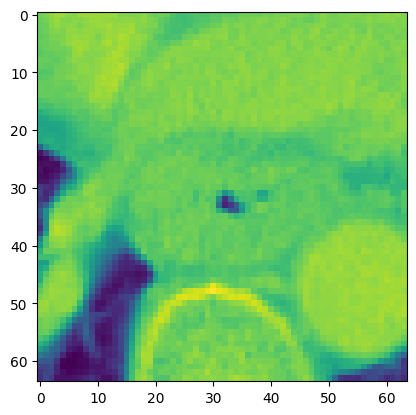

./testnumpy/186373.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/145512/Pre/RS.1.2.246.352.205.4619295704109805216.1116048342332230023.dcm
Structure: gtv_1 found


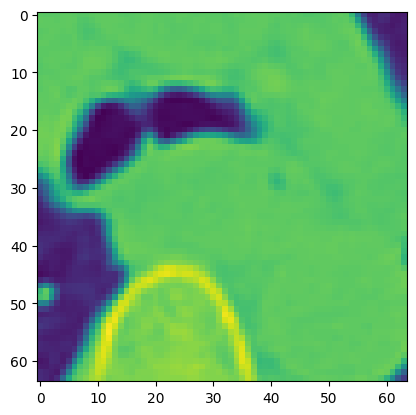

./testnumpy/145512.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/171744/Pre/RS.1.2.246.352.205.5762497237017634217.15961980624958753722.dcm
Structure: gtv_1 found


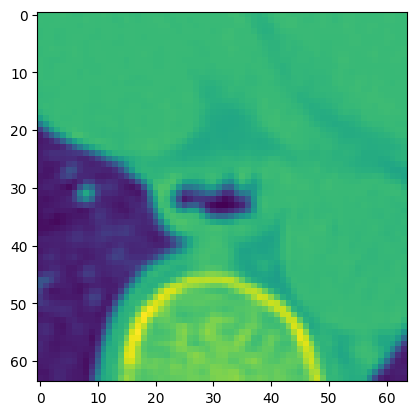

./testnumpy/171744.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/163424/Pre/RS.1.2.246.352.205.4972436440410836767.7891785441379736242.dcm
Structure: gtv_1 found


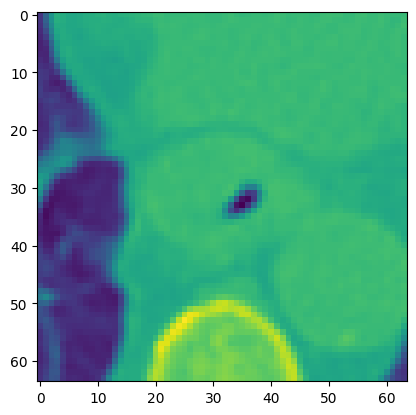

./testnumpy/163424.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/247238/Pre/RS.1.2.246.352.205.5042208065234624816.17795771085128115362.dcm
Structure: gtv_1 found


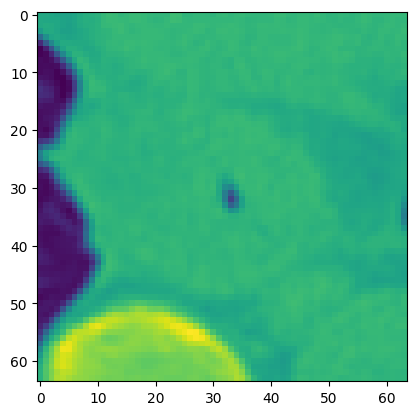

./testnumpy/247238.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/242927/Pre/RS.1.2.246.352.205.4764198942160013040.14749530118320454332.dcm
Structure: gtv_1 found


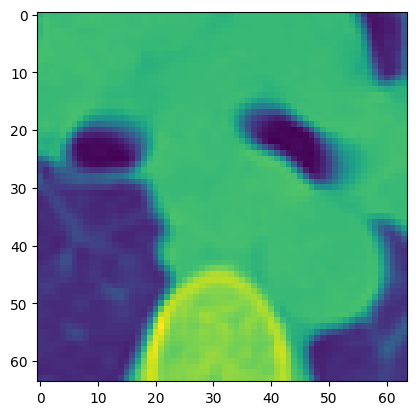

./testnumpy/242927.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/156998/Pre/RS.1.2.246.352.205.5432409567443800048.14544135082916149161.dcm
Structure: gtv_1 found


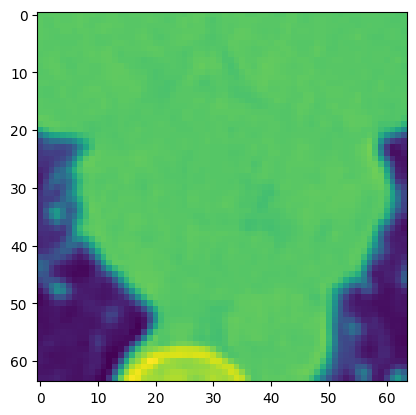

./testnumpy/156998.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/141321/Pre/RS.1.2.246.352.205.5065702942318289517.17682046055803350939.dcm
Structure: gtv_1 found


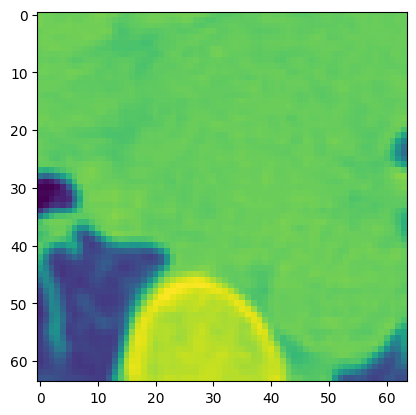

./testnumpy/141321.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/214301/Pre/RS.1.2.246.352.205.4686430040953222962.12827089834322156953.dcm
Structure: gtv__1 found


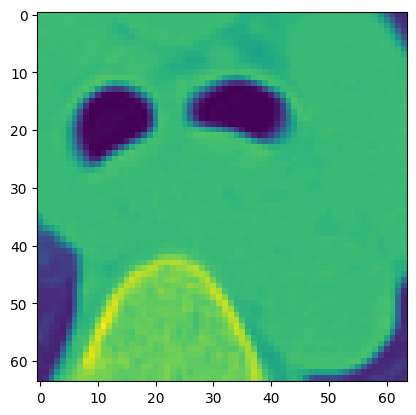

./testnumpy/214301.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/213179/Pre/RS.1.2.246.352.205.5393580673223914601.5571490607385197467.dcm
Structure: gtv_1 found


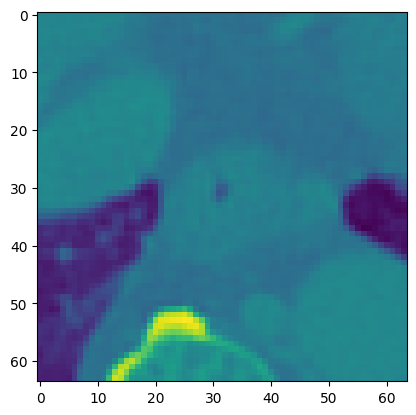

./testnumpy/213179.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/190660/Pre_CT/RS.1.2.246.352.205.5553380451381155268.2568160991465210788.dcm
Structure: gtv_1 found


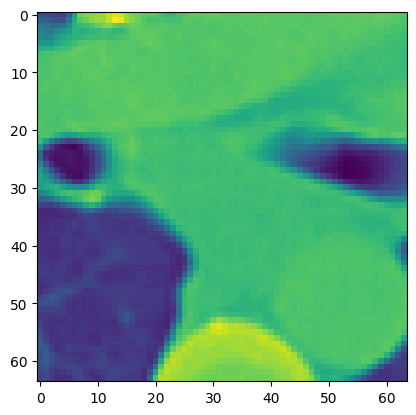

./testnumpy/190660.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/139047/Pre/RS.1.2.246.352.205.5556067472966744334.13142455003575094190.dcm
Structure: gtv_1 found


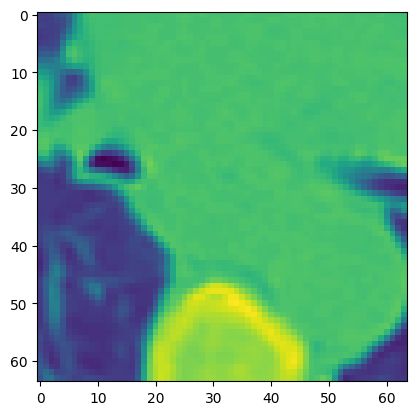

./testnumpy/139047.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/141368/Pre/RS.1.2.246.352.205.5747804603873964405.6094356702586455202.dcm
Structure: gtv__1 found


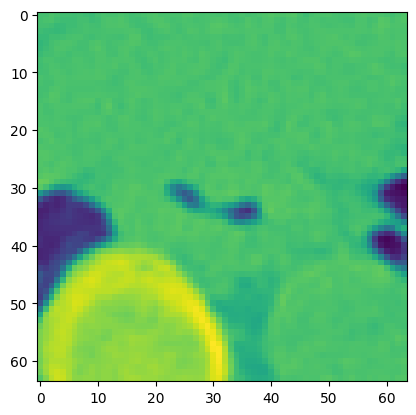

./testnumpy/141368.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/185521/Pre/RS.1.2.246.352.205.5090455431796104264.12134744392463901329.dcm
Structure: gtv__1 found


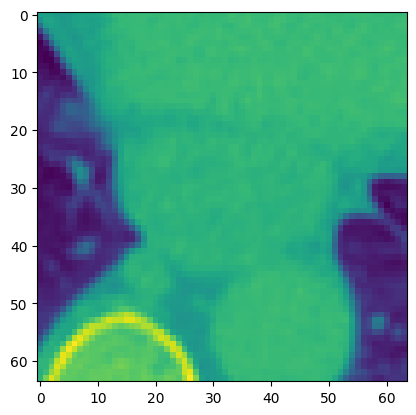

./testnumpy/185521.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/150427/Pre/RS.1.2.246.352.205.5316158724586601567.9259790509463153041.dcm
Structure: gtv_1 found


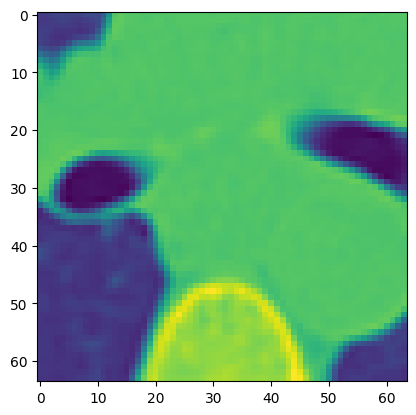

./testnumpy/150427.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/206285/Pre/RS.1.2.246.352.205.5294364135993965811.7535232358603127444.dcm
Structure: gtv_1 found


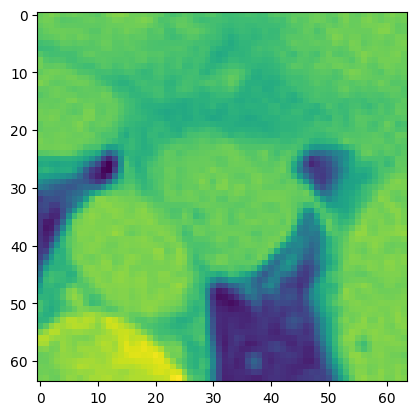

./testnumpy/206285.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/269721/Pre/RS.1.2.246.352.205.5080371632690567836.811123142489180820.dcm
Structure: gtv_1 found


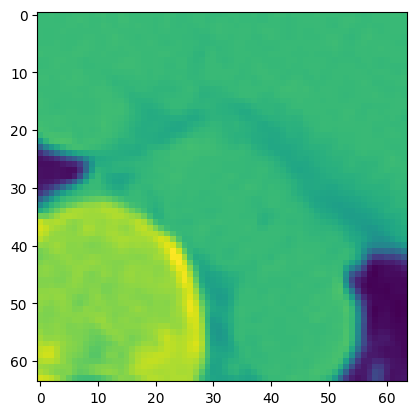

./testnumpy/269721.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/150224/Pre_CT_10mm/RS.1.2.246.352.71.4.513149349817.236080.20200606210855.dcm
Structure: gtv_1 found


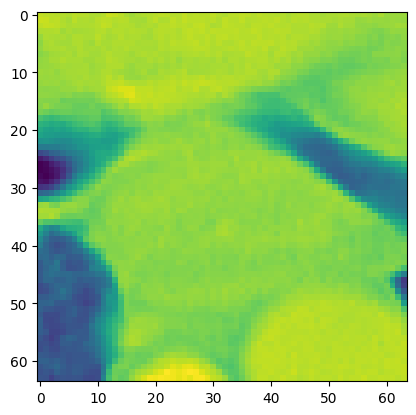

./testnumpy/150224.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/171705/Pre/RS.1.2.246.352.205.5748391302098851215.11219264534718227091.dcm
Structure: gtv_1 found


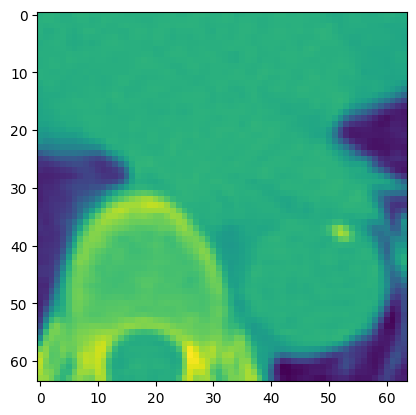

./testnumpy/171705.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/153203/Pre/RS.1.2.246.352.205.5031212379822034719.1173646656558653614.dcm
Structure: gtv_1 found


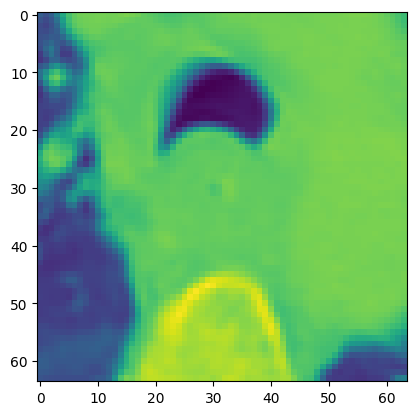

./testnumpy/153203.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/231203/Pre/RS.1.2.246.352.205.5368243877455143156.3236181383001442453.dcm
Structure: gtv_1 found


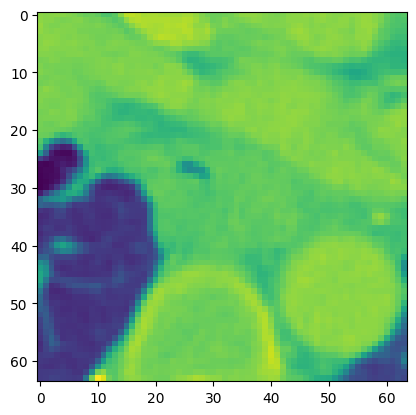

./testnumpy/231203.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/219035/Pre/RS.1.2.246.352.205.5537421158495812442.8665843893701286276.dcm
Structure: gtv_1 found


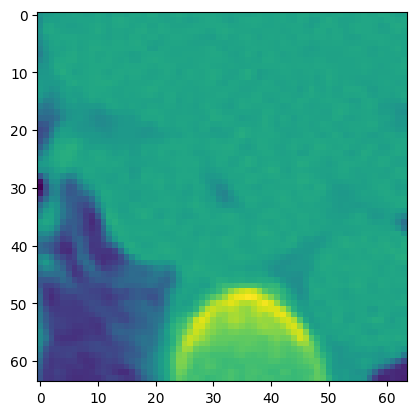

./testnumpy/219035.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/190037/Pre/RS.1.2.246.352.205.4680131885347438712.16819205937378362525.dcm
Structure: gtv_1 found


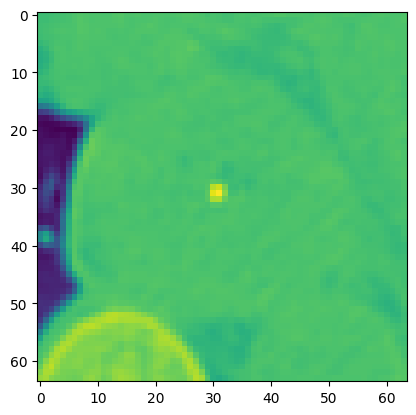

./testnumpy/190037.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/212840/Pre/RS.1.2.246.352.205.5649113046314344030.1472715160271642781.dcm
Structure: gtv__1 found


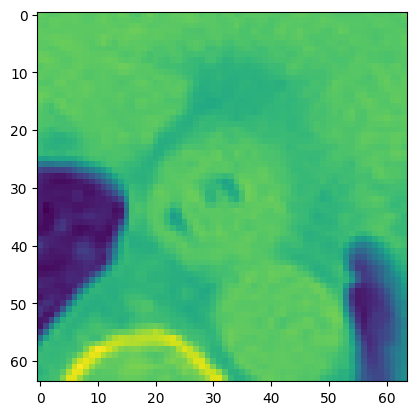

./testnumpy/212840.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/215803/Pre/RS.1.2.246.352.205.5010699225941951909.2613448080474899090.dcm
Structure: gtv_1 found


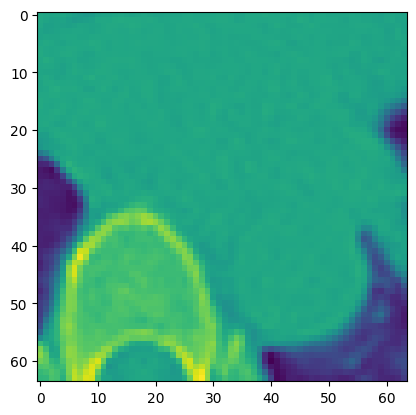

./testnumpy/215803.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/270000/Pre/RS.1.2.246.352.205.5466870021369304209.13248237363033724581.dcm
Structure: gtv_1 found


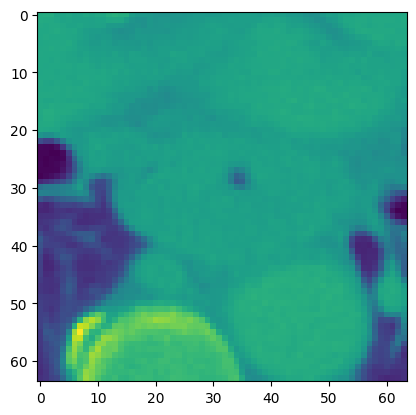

./testnumpy/270000.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/254098/Pre/RS.1.2.246.352.205.5726246673944603683.7947786300217832869.dcm
Structure: gtv_1 found


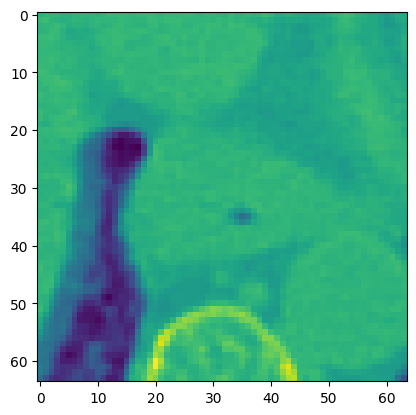

./testnumpy/254098.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/265174/Pre/RS.1.2.246.352.205.4717669774251991425.7325685187030862727.dcm
Structure: gtv_1 found


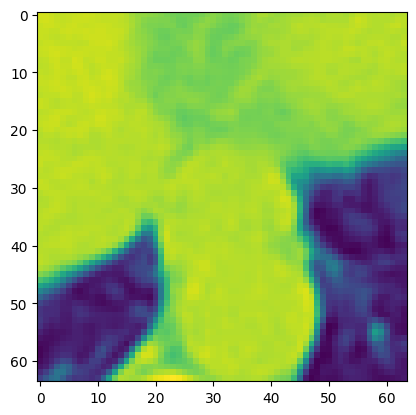

./testnumpy/265174.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/152382/Pre/RS.1.2.246.352.205.4993032366806258463.7791815623074333118.dcm
Structure: gtv_1 found


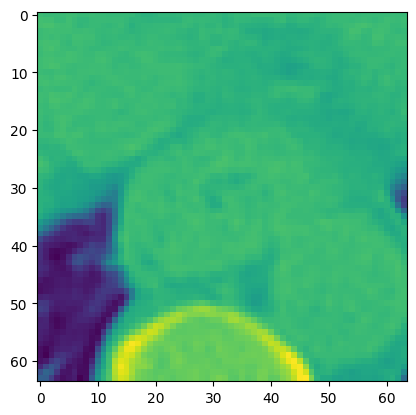

./testnumpy/152382.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/201294/Pre/RS.1.2.246.352.205.5191799994228573566.9304452681130413199.dcm
Structure: gtv_1 found


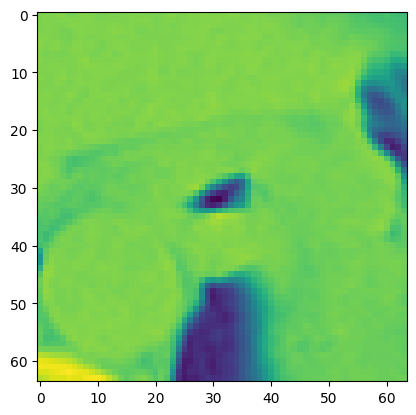

./testnumpy/201294.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/216678/Pre/RS.1.2.246.352.205.5079869038024335089.837027390961574845.dcm
Structure: gtv_1 found


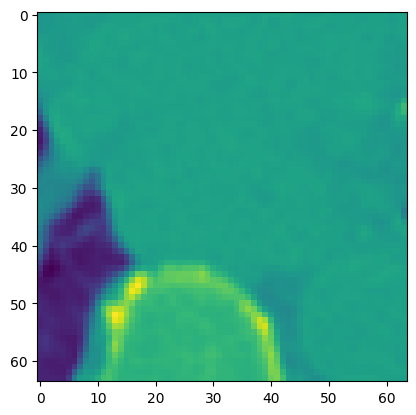

./testnumpy/216678.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/182623/Pre/RS.1.2.246.352.205.4784263690774749728.888620940585876666.dcm
Structure: gtv_1 found


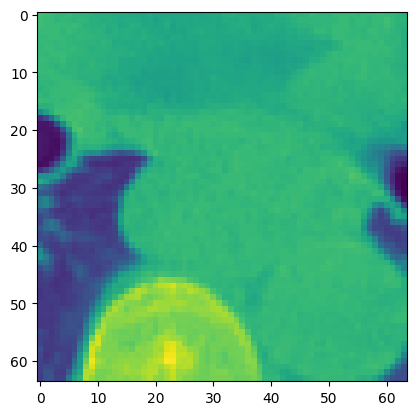

./testnumpy/182623.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/183957/Pre/RS.1.2.246.352.205.5085986121250526031.9982754864637078703.dcm
Structure: gtv_1 found


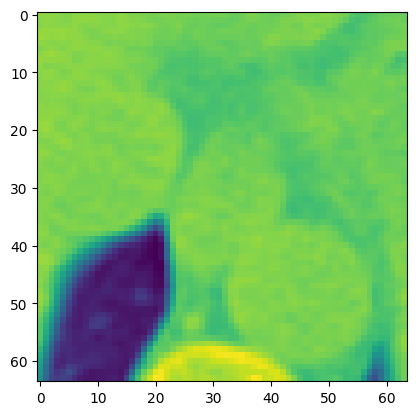

./testnumpy/183957.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/147778/Pre/RS.1.2.246.352.205.5272218960165872119.1018081410912082622.dcm
Structure: gtv__1 found


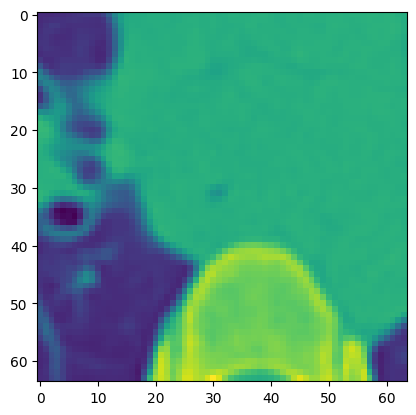

./testnumpy/147778.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/242487/Pre/RS.1.2.246.352.205.5659853730352673625.6375191936356447118.dcm
Structure: gtv_1 found


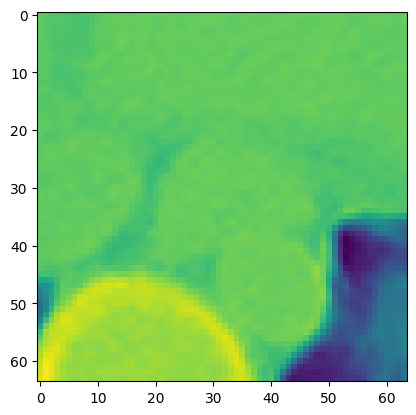

./testnumpy/242487.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/170303/Pre/RS.1.2.246.352.205.5339072773456716415.9613286010531132838.dcm
Structure: gtv__1 found


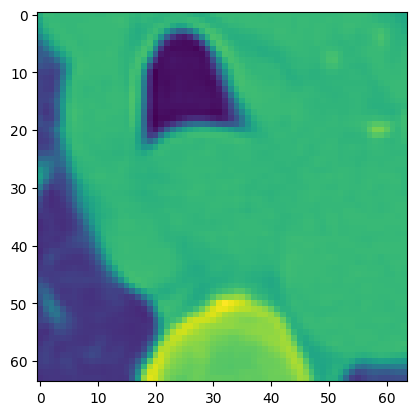

./testnumpy/170303.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/128048/Pre/RS.1.2.246.352.205.4877010209157690602.2479269255096801670.dcm
Structure: gtv_1 found


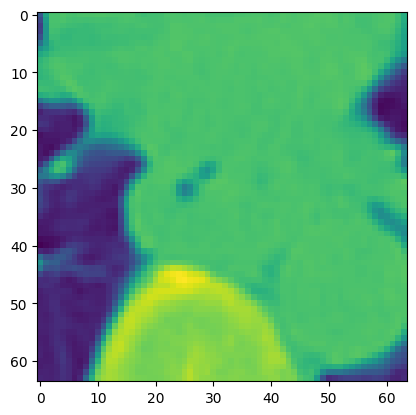

./testnumpy/128048.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/213813/Pre/RS.1.2.246.352.205.5432622311361013384.7370571655296944807.dcm
Structure: gtv_1 found


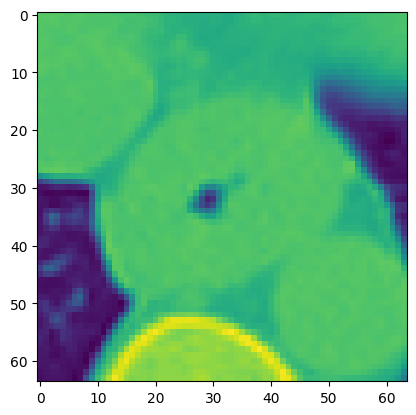

./testnumpy/213813.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/222761/Pre/RS.1.2.246.352.205.5341202754371567242.4813298859435474584.dcm
Structure: gtv_1 found


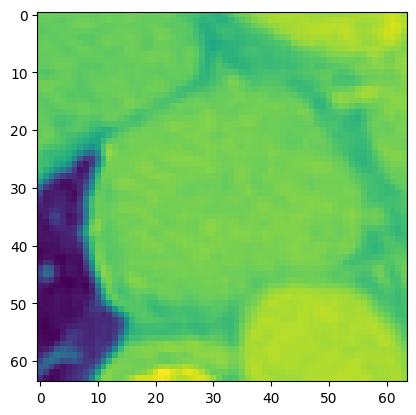

./testnumpy/222761.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/192416/Pre/RS.1.2.246.352.205.5324750151897807426.17195080319693041336.dcm
Structure: gtv_1 found


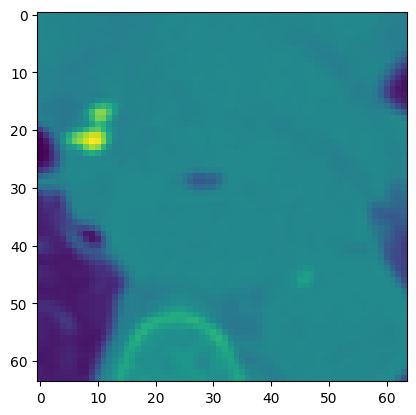

./testnumpy/192416.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/246871/Pre/RS.1.2.246.352.205.4639276548564282960.4638379900393745064.dcm
Structure: gtv_1 found


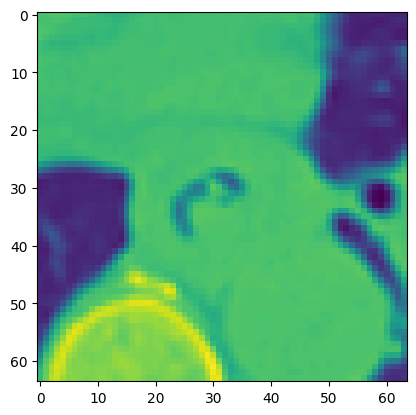

./testnumpy/246871.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/146062/Pre/RS.1.2.246.352.205.4636875728452802885.910740834230258325.dcm
Structure: gtv_1 found


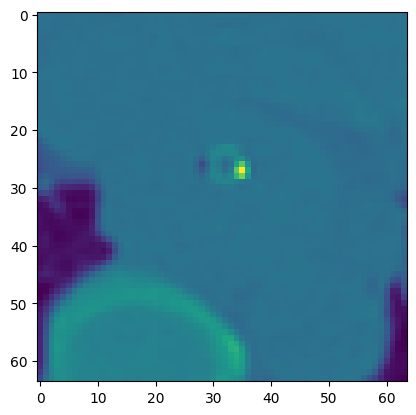

./testnumpy/146062.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/163587/Pre/RS.1.2.246.352.205.4991325898456267830.11019607686877115277.dcm
Structure: gtv_1 found


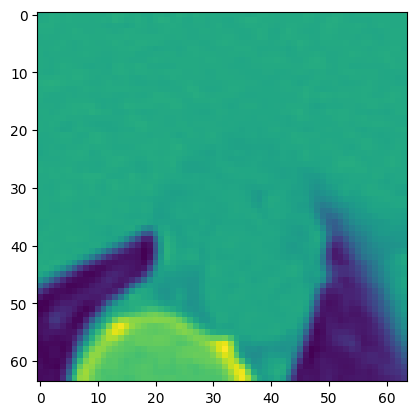

./testnumpy/163587.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/187366/Pre_CT/RS.1.2.246.352.71.4.513149349817.225530.20200207100213.dcm
Structure: gtv_1 found


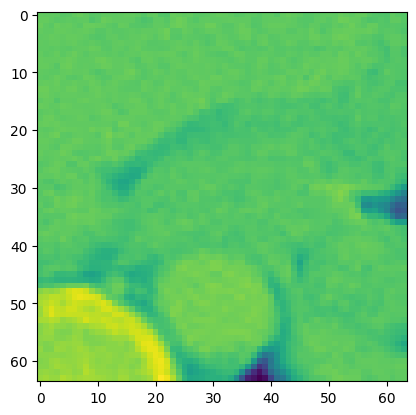

./testnumpy/187366.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/127856/Pre/RS.1.2.246.352.205.4859368061988999029.10403087731083065785.dcm
Structure: gtv_1 found


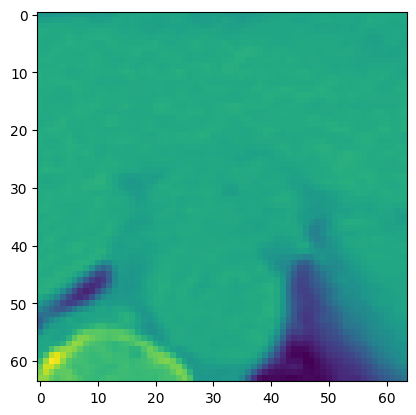

./testnumpy/127856.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/233445/Pre/RS.1.2.246.352.205.5077064515122347307.9610255009004058797.dcm
Structure: gtv_1 found


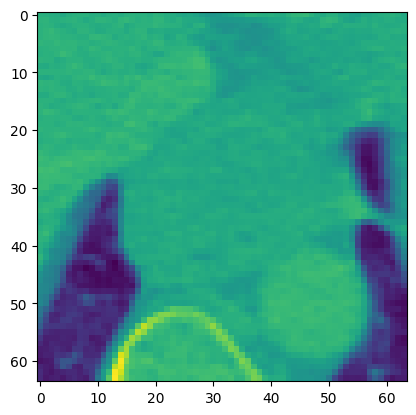

./testnumpy/233445.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/165825/Pre/RS.1.2.246.352.205.5307949199760348156.17784780517850511752.dcm
Structure: gtv_1 found


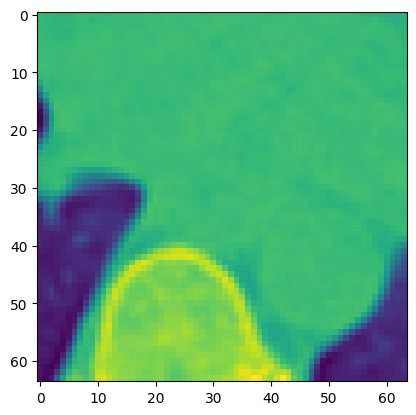

./testnumpy/165825.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/180385/Pre/RS.1.2.246.352.205.5482087720400864923.1373369078268831876.dcm
Structure: gtv__1 found


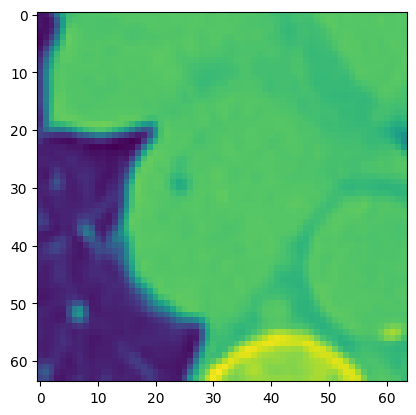

./testnumpy/180385.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/177510/Pre/RS.1.2.246.352.205.4775127023201808031.9206304865958350521.dcm
Structure: gtv__1 found


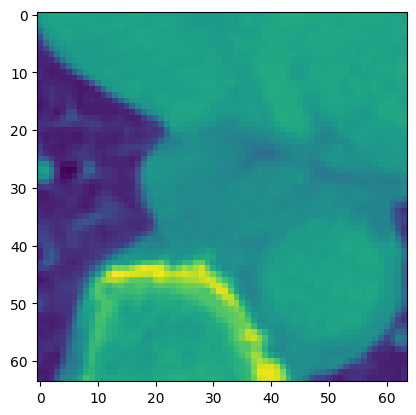

./testnumpy/177510.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/188918/Pre/RS.1.2.246.352.205.4872350848435500192.13903581479474674872.dcm
Structure: gtv_1 found


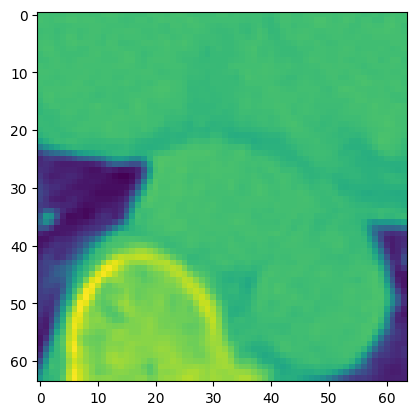

./testnumpy/188918.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/264325/Pre/RS.1.2.246.352.205.4924232086075276535.4175146197024320918.dcm
Structure: gtv_1 found


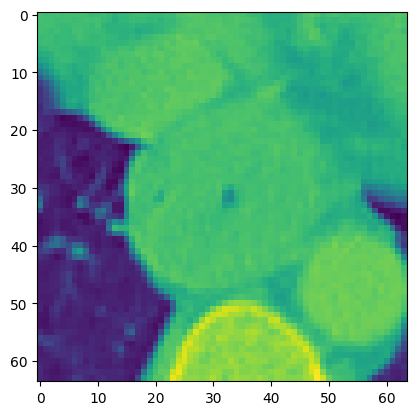

./testnumpy/264325.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/254572/Pre/RS.1.2.246.352.205.5409305691493579843.7978517916645705613.dcm
Structure: gtv_1 found


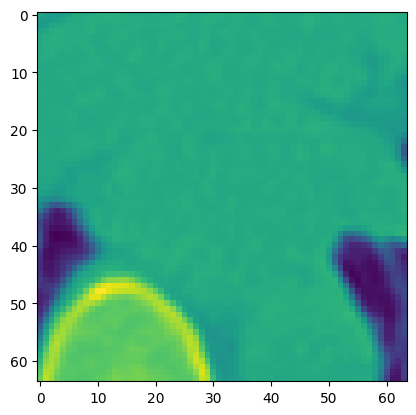

./testnumpy/254572.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/197303/Pre/RS.1.2.246.352.205.4651344449028682349.4476927430235960222.dcm
Structure: gtv_1 found


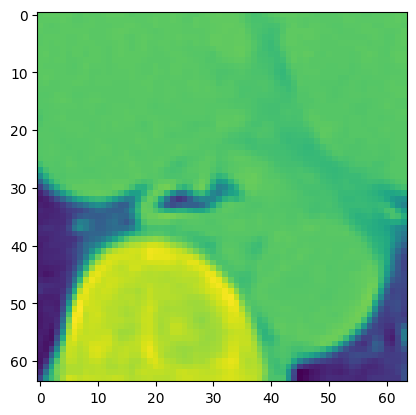

./testnumpy/197303.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/174995/Pre/RS.1.2.246.352.205.4791248654401204307.3155383285471898787.dcm
Structure: gtv__1 found


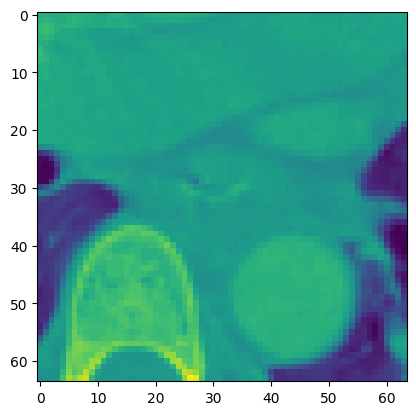

./testnumpy/174995.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/223813/Pre_RTP/RS.1.2.246.352.205.5725266075052398521.9022922527359150525.dcm
Structure: gtv_1 found


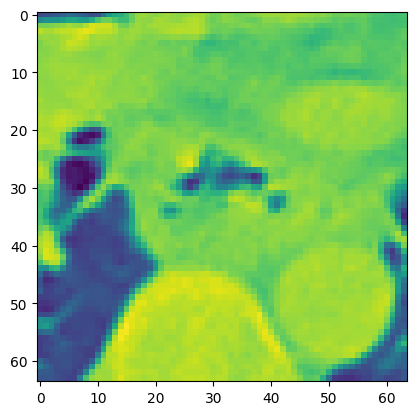

./testnumpy/223813.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/243795/Pre/RS.1.2.246.352.205.5069051865086596768.12636724417590495111.dcm
Structure: gtv_1 found


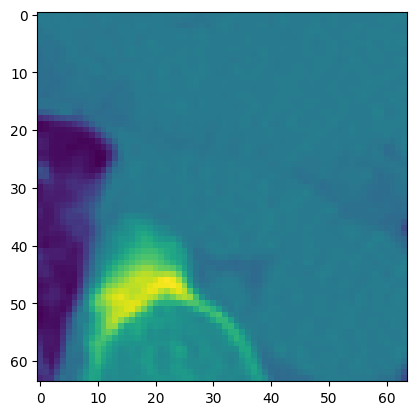

./testnumpy/243795.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/191065/Pre/RS.1.2.246.352.205.5571094526828869084.15218192972210223246.dcm
Structure: gtv_1 found


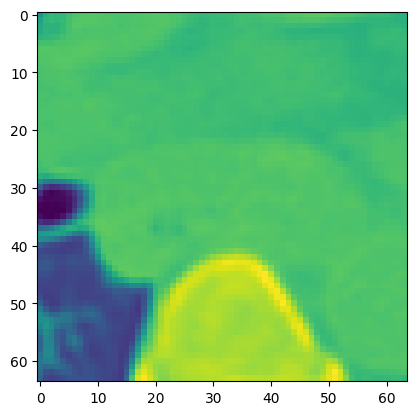

./testnumpy/191065.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/199495/Pre_CT/RS.1.2.246.352.205.5210446466914811582.5520528419150988687.dcm
Structure: gtv_1 found


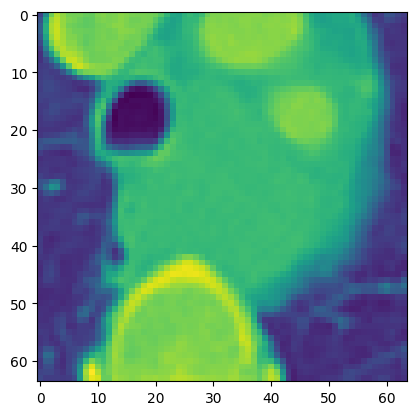

./testnumpy/199495.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/174978/Pre/RS.1.2.246.352.205.4725386054267119559.11763736507731330998.dcm
Structure: gtv_1 found


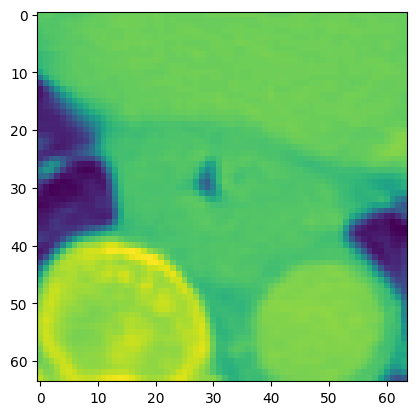

./testnumpy/174978.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/130498/Pre/RS.1.2.246.352.205.5596993187352121839.11579229585857340049.dcm
Structure: gtv_1 found


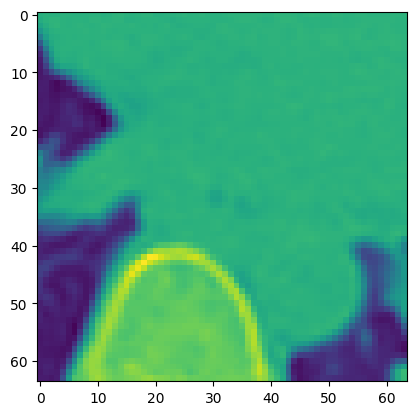

./testnumpy/130498.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/127279/Pre/RS.1.2.246.352.205.4962172505629668644.9270233318173866889.dcm
Structure: gtv_1 found


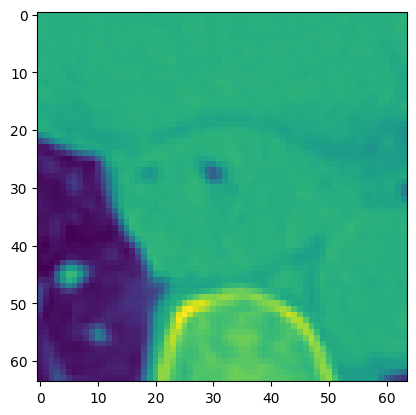

./testnumpy/127279.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/211733/Pre/RS.1.2.246.352.205.5236265326988047728.15018437886899263159.dcm
Structure: gtv_1 found


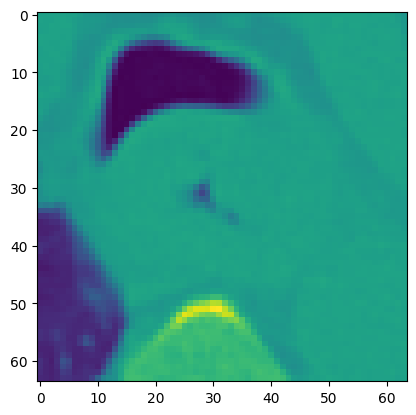

./testnumpy/211733.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/211368/Pre/RS.1.2.246.352.205.5112261769376244340.7844861167853691293.dcm
Structure: gtv_1 found


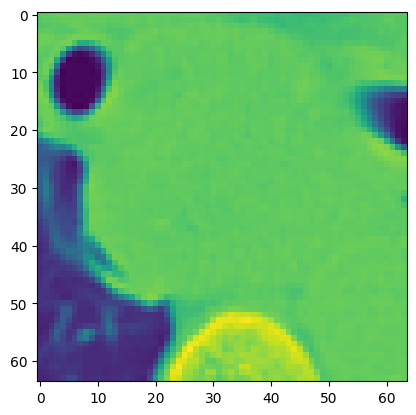

./testnumpy/211368.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/180131/Pre/RS.1.2.246.352.205.5342172356705906329.15109971218884109975.dcm
Structure: gtv_1 found


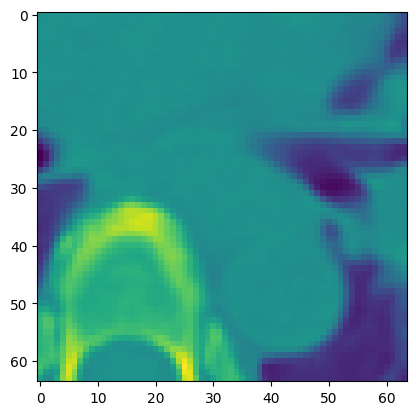

./testnumpy/180131.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/165437/Pre/RS.1.2.246.352.205.4807589649316544956.18279970085875023275.dcm
Structure: gtv_1 found


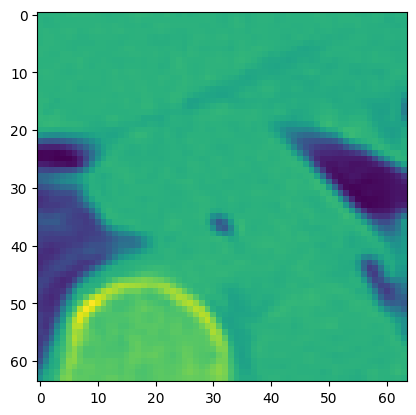

./testnumpy/165437.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/187313/Pre/RS.1.2.246.352.205.5340480894400179883.9381646254326797956.dcm
Structure: gtv_1 found


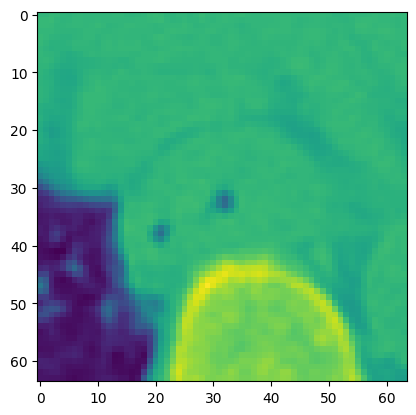

./testnumpy/187313.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/273913/Pre/RS.1.2.246.352.205.5630976962474490992.3211935635299981485.dcm
Structure: gtv_1 found


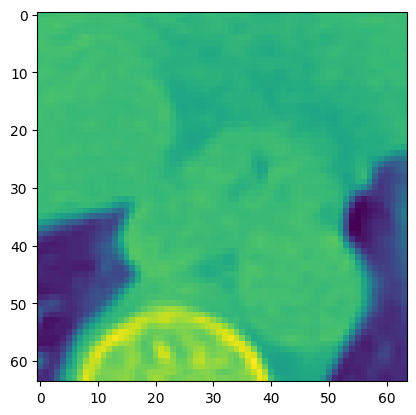

./testnumpy/273913.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/273580/Pre/RS.1.2.246.352.205.5617757036122185816.17183203738827201467.dcm
Structure: gtv_1 found


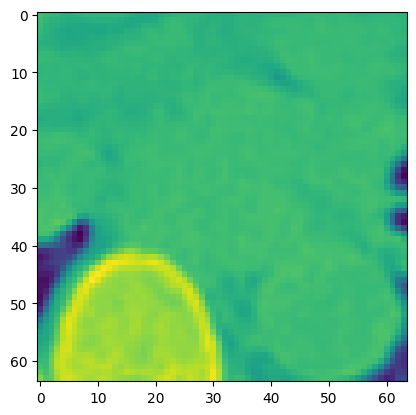

./testnumpy/273580.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/166283/Pre/RS.1.2.246.352.205.5731412470543961484.215411057480489121.dcm
Structure: gtv__1 found


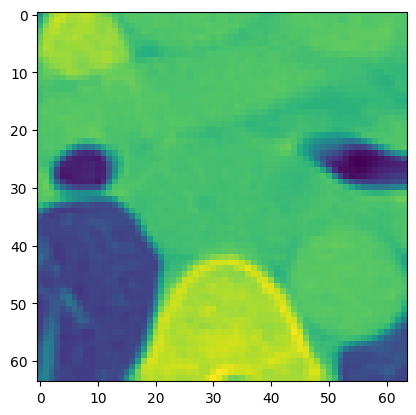

./testnumpy/166283.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/132537/Pre/RS.1.2.246.352.205.5083441736489532981.10457529357511680171.dcm
Structure: gtv_1 found


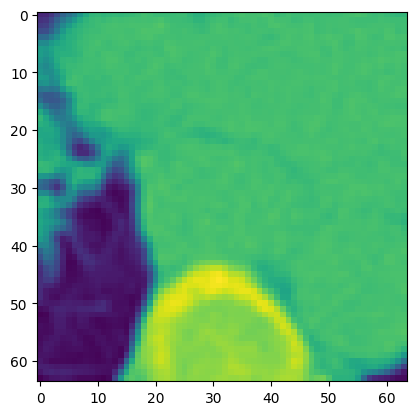

./testnumpy/132537.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/137283/Pre/RS.1.2.246.352.205.5029732050046580842.13816894885893803146.dcm
Structure: gtv_1 found


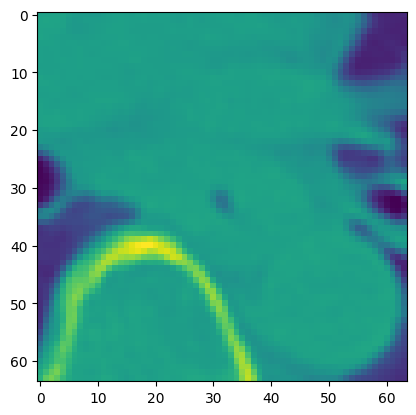

./testnumpy/137283.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/257947/Pre/RS.1.2.246.352.205.4950247464927048104.12943173686249931704.dcm
Structure: gtv_1 found


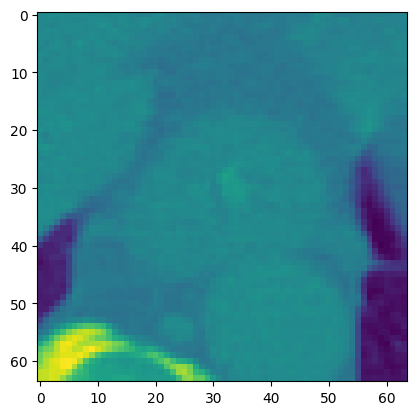

./testnumpy/257947.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/230683/Pre/RS.1.2.246.352.205.5346810021661898949.2180422487503392175.dcm
Structure: gtv_1 found


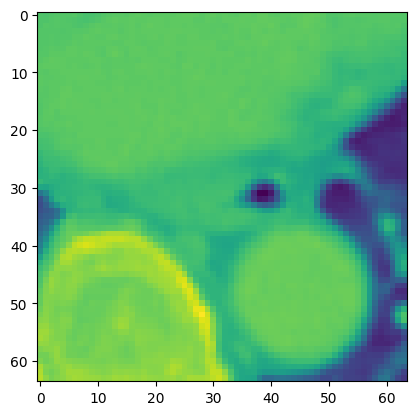

./testnumpy/230683.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/183371/Pre/RS.1.2.246.352.205.5721589765282624852.16434727031201884851.dcm
Structure: gtv_1 found


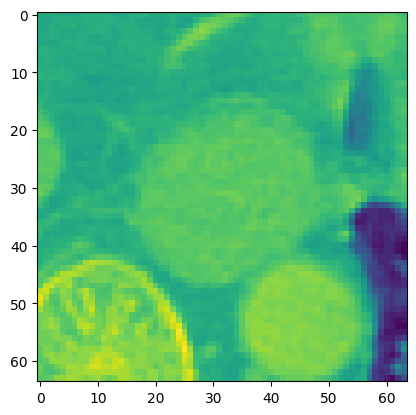

./testnumpy/183371.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/256465/Pre/RS.1.2.246.352.205.5093771881702129282.984865841952029375.dcm
Structure: gtv_1 found


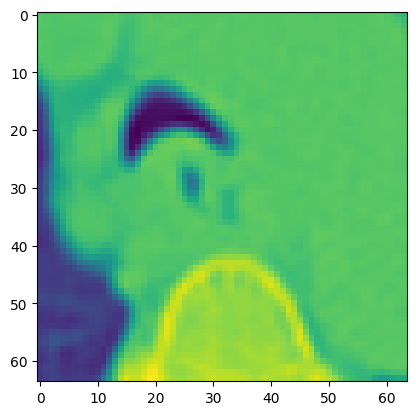

./testnumpy/256465.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/208071/Pre/RS.1.2.246.352.205.5688474155357354101.11708530609636696763.dcm
Structure: gtv_1 found


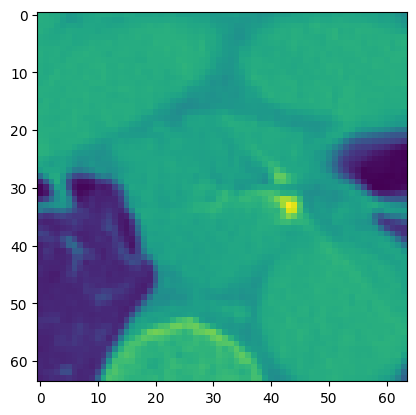

./testnumpy/208071.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/199281/Pre/RS.1.2.246.352.205.5596953247966306079.12898497446995278726.dcm
Structure: gtv_1 found


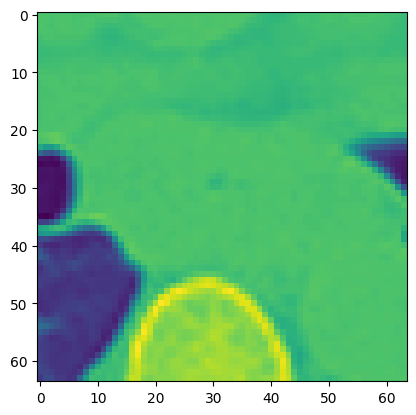

./testnumpy/199281.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/187377/Pre/RS.1.2.246.352.205.5078399671839376702.2089586539580771474.dcm
Structure: gtv_1 found


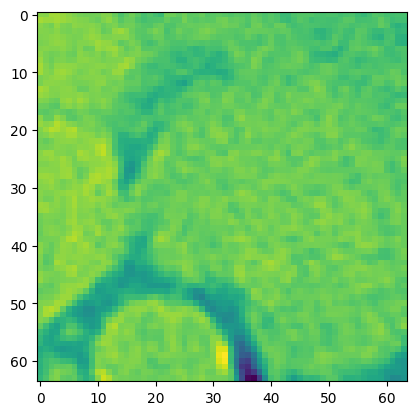

./testnumpy/187377.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/225155/Pre/RS.1.2.246.352.205.5096416295928342758.4882185797452637855.dcm
Structure: gtv_1 found


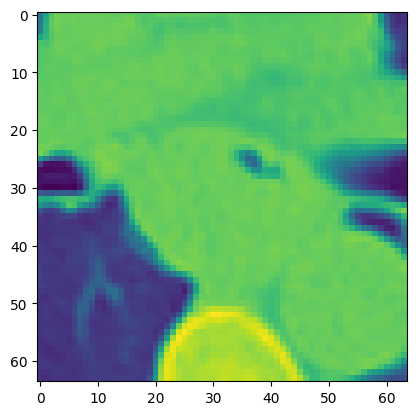

./testnumpy/225155.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/262867/Pre/RS.1.2.246.352.205.5220022637782759373.13358733814700044436.dcm
Structure: gtv_1 found


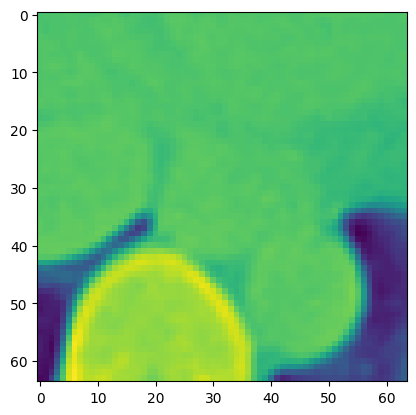

./testnumpy/262867.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/261282/Pre/RS.1.2.246.352.205.4846763096825366957.9022452619992053692.dcm
Structure: gtv_1 found


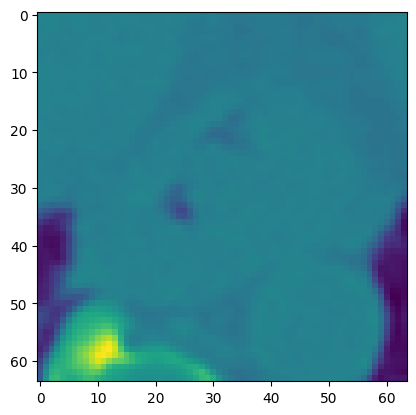

./testnumpy/261282.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/215563/Pre/RS.1.2.246.352.205.5441912014425420029.7906167985888846474.dcm
Structure: gtv_1 found


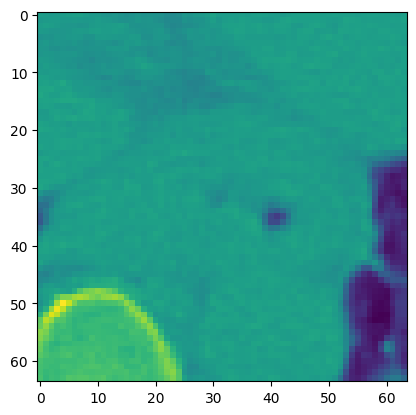

./testnumpy/215563.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/274108/Pre/RS.1.2.246.352.205.5137653572358454211.3204471890973691557.dcm
Structure: gtv_1 found


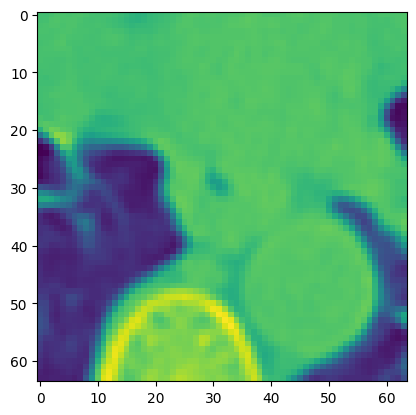

./testnumpy/274108.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/194154/Pre/RS.1.2.246.352.205.5472292839461924834.14516166059941061023.dcm
Structure: gtv_1 found


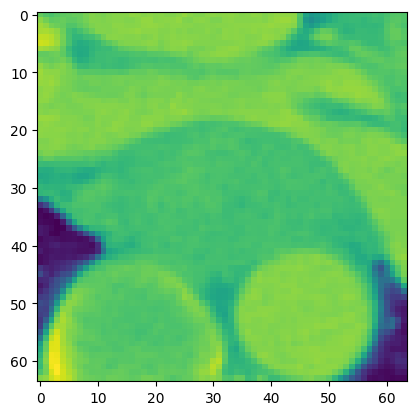

./testnumpy/194154.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/152904/Pre/RS.1.2.246.352.205.4872275325464292778.14910102582355685278.dcm
Structure: gtv_1 found


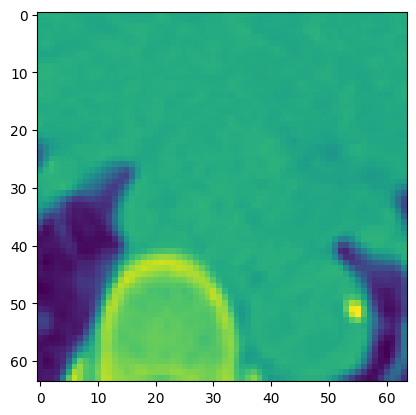

./testnumpy/152904.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/264647/Pre/RS.1.2.246.352.205.4966488776787850363.18102280695311308954.dcm
Structure: gtv_1 found


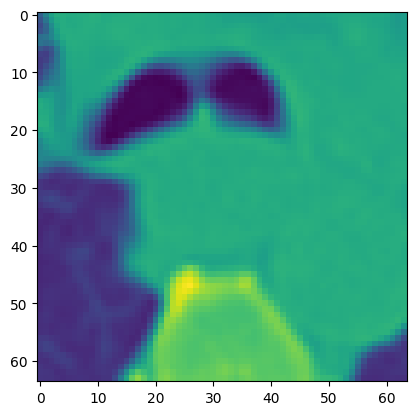

./testnumpy/264647.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/273851/Pre/RS.1.2.246.352.205.5216859392145560073.17477762807308515482.dcm
Structure: gtv_1 found


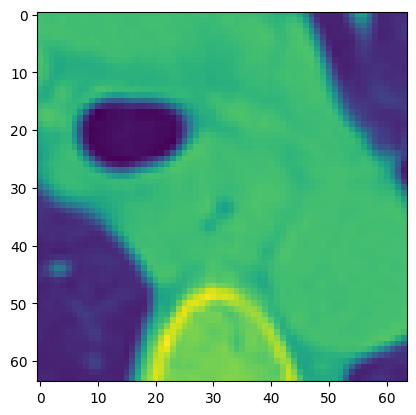

./testnumpy/273851.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/229471/Pre/RS.1.2.246.352.205.4883572133153722921.15326083014340941444.dcm
Structure: gtv_1 found


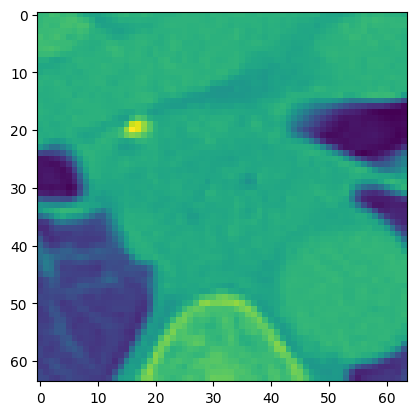

./testnumpy/229471.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/228557/Pre/RS.1.2.246.352.205.4684336391728711881.17430004736488586137.dcm
Structure: gtv_1 found


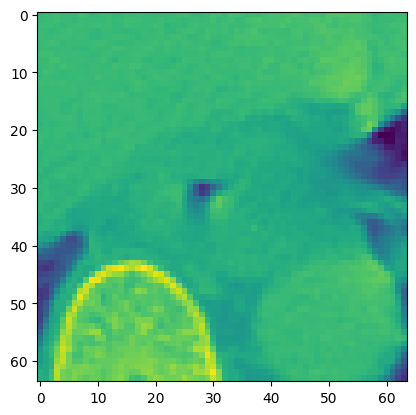

./testnumpy/228557.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/262588/Pre/RS.1.2.246.352.205.4652575951601503222.10566260110327704735.dcm
Structure: gtv_1 found


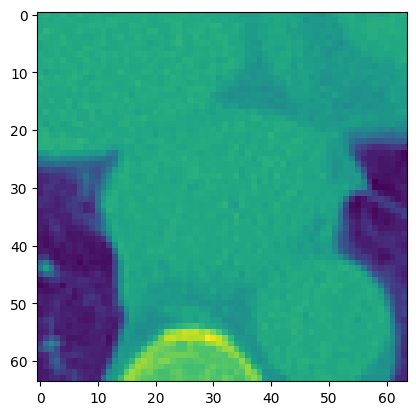

./testnumpy/262588.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/272521/Pre/RS.1.2.246.352.205.5013219174885354573.13896867118776201388.dcm
Structure: gtv_1 found


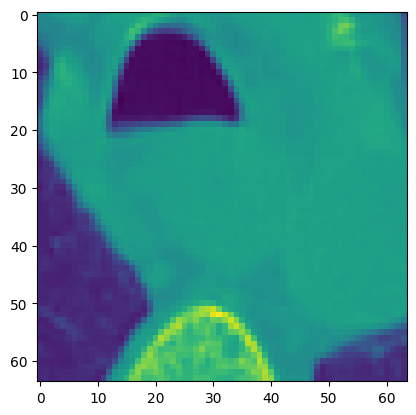

./testnumpy/272521.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/184249/Pre/RS.1.2.246.352.205.5321386822682239966.15489471955591653303.dcm
Structure: gtv_1 found


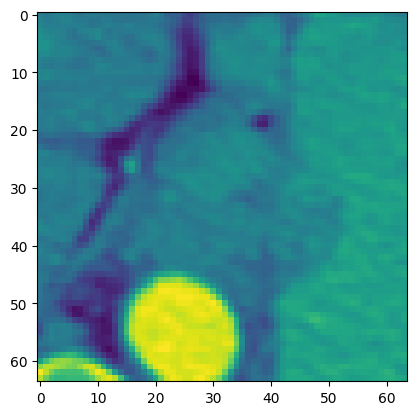

./testnumpy/184249.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/257008/Pre/RS.1.2.246.352.205.5430488932663470842.8427408878270927753.dcm
Structure: gtv_1 found


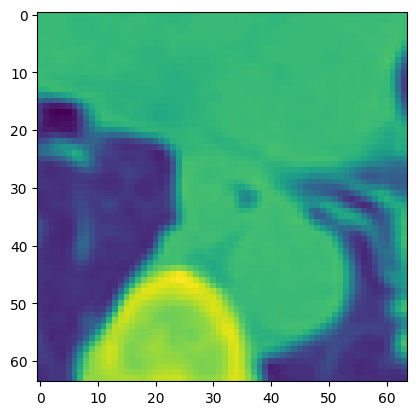

./testnumpy/257008.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/171783/Pre/RS.1.2.246.352.205.5669578096466806901.13111216236731114897.dcm
Structure: gtv__1 found


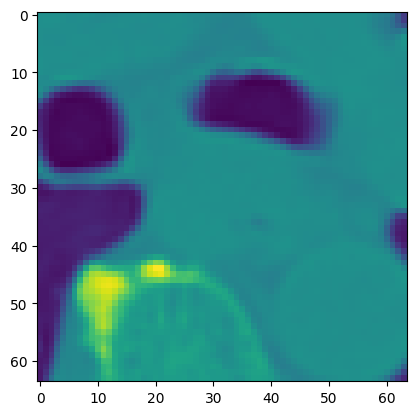

./testnumpy/171783.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/271767/Pre/RS.1.2.246.352.205.5236673703746839743.5515081259183222432.dcm
Structure: gtv_1 found


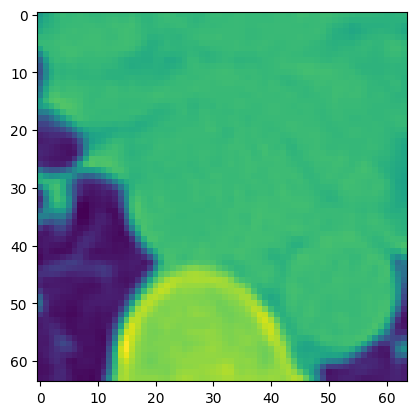

./testnumpy/271767.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/271599/Pre/RS.1.2.246.352.205.5047937378622923815.11629678008051496092.dcm
Structure: gtv_1 found


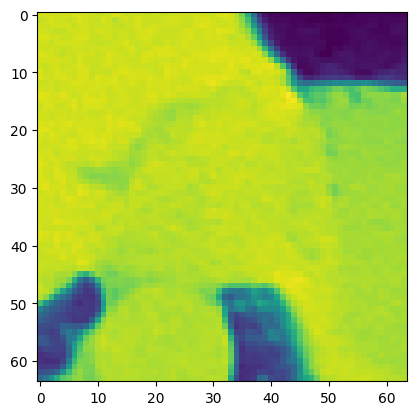

./testnumpy/271599.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/254285/Pre/RS.1.2.246.352.205.5386124852716579396.7729309864350418833.dcm
Structure: gtv_1 found


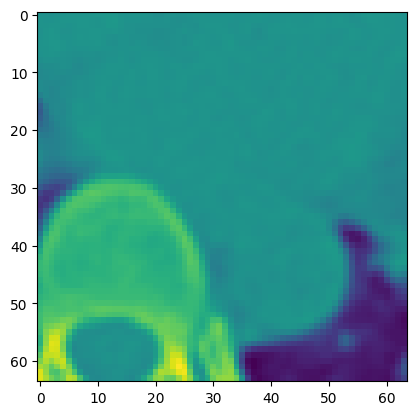

./testnumpy/254285.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/192518/Pre/RS.1.2.246.352.205.5709363442561806005.9564740266258741948.dcm
Structure: gtv_1 found


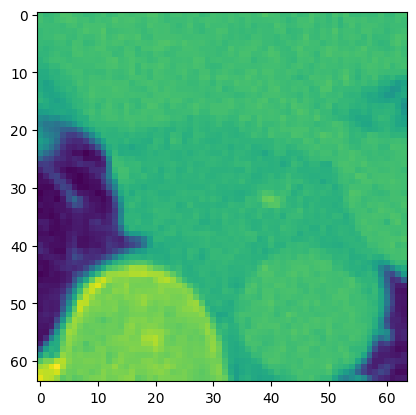

./testnumpy/192518.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/271335/Pre/RS.1.2.246.352.205.5330511315578934711.13826997337745864326.dcm
Structure: gtv_1 found


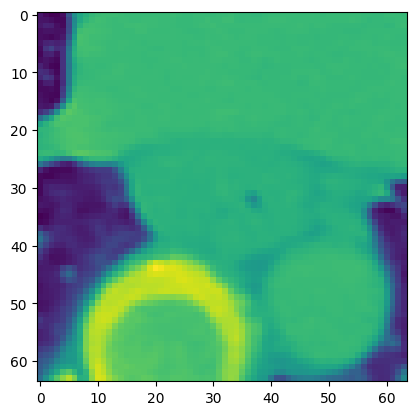

./testnumpy/271335.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/167678/Pre/RS.1.2.246.352.205.5659548223569269151.8652919173561088897.dcm
Structure: gtv_1 found


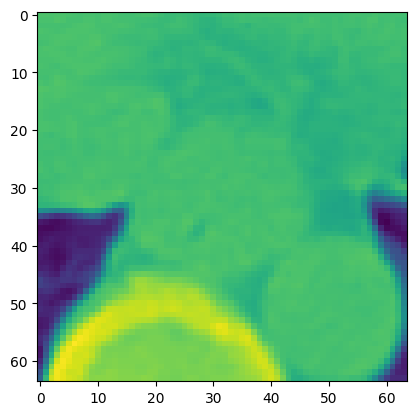

./testnumpy/167678.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/201489/Pre/RS.1.2.246.352.205.5635736319727628136.16472520139877436547.dcm
Structure: gtv_1 found


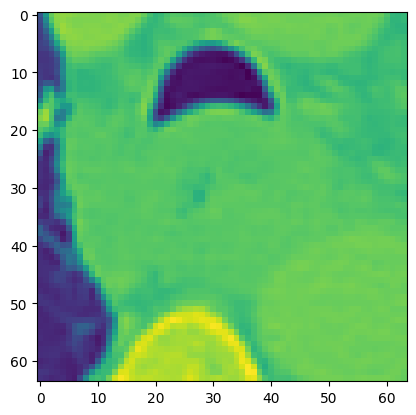

./testnumpy/201489.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/167676/Pre/RS.1.2.246.352.205.5154459843586326863.16519192495067641258.dcm
Structure: gtv_1 found


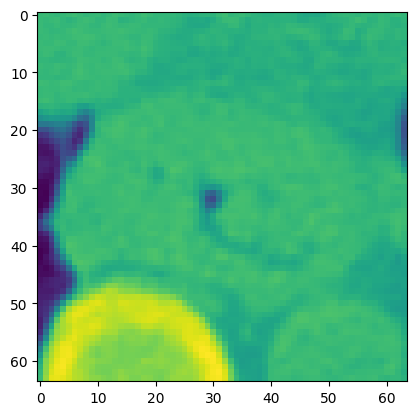

./testnumpy/167676.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/271152/Pre/RS.1.2.246.352.205.4707050165580057187.10264448285856483505.dcm
Structure: gtv_1 found


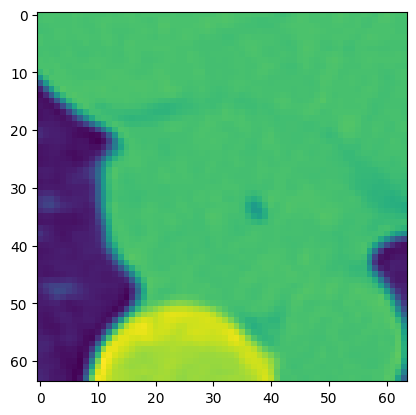

./testnumpy/271152.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/221074/Pre/RS.1.2.246.352.205.5223173377471329060.12055365885807284921.dcm
Structure: gtv_1 found


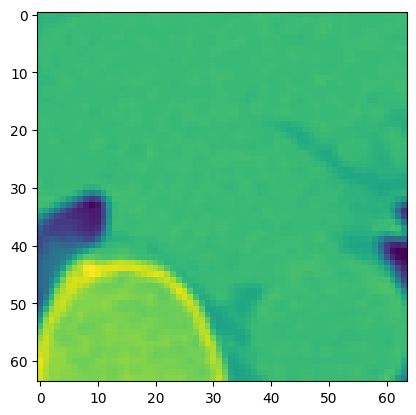

./testnumpy/221074.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/169981/Pre/RS.1.2.246.352.205.5326014971842299765.1472405003121127350.dcm
Structure: gtv_1 found


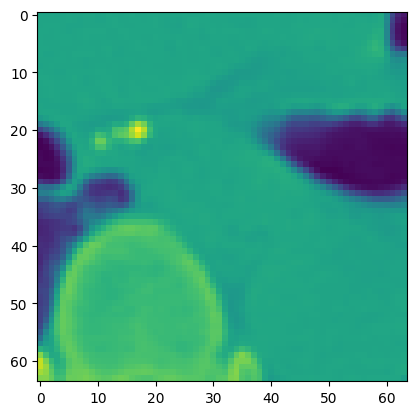

./testnumpy/169981.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/267008/Pre/RS.1.2.246.352.205.5639554893823261668.13409012672068803985.dcm
Structure: gtv_1 found


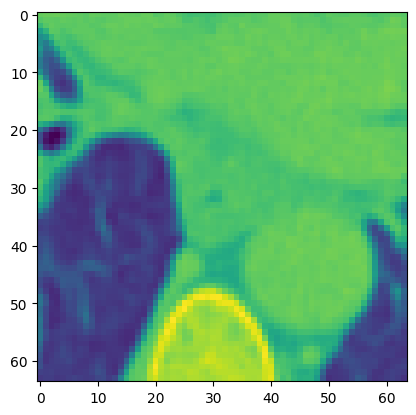

./testnumpy/267008.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/140490/Pre/RS.1.2.246.352.205.5753730921534557715.12792253526776241308.dcm
Structure: gtv_1 found


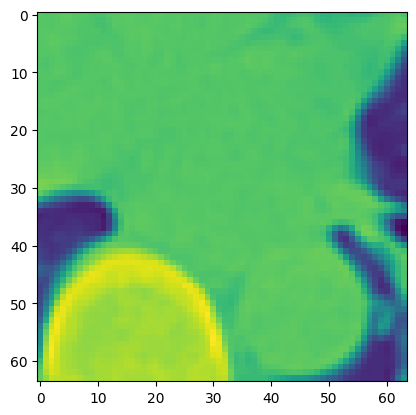

./testnumpy/140490.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/239022/Pre/RS.1.2.246.352.205.5531246572497982795.11978202119475157669.dcm
Structure: gtv_1 found


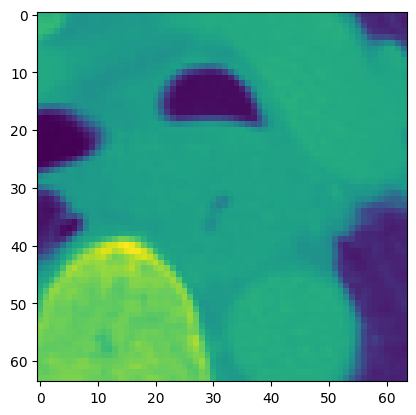

./testnumpy/239022.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/270691/Pre/RS.1.2.246.352.205.5087123911588452238.8252443203579618206.dcm
Structure: gtv_1 found


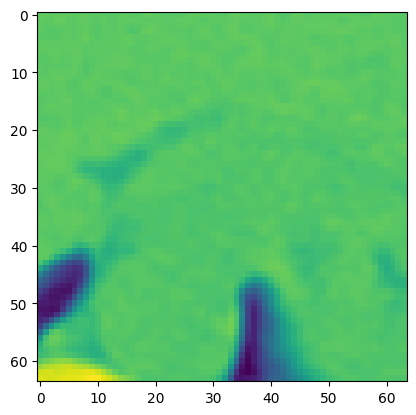

./testnumpy/270691.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/196708/Pre/RS.1.2.246.352.205.4902994896823254426.611675514626535828.dcm
Structure: gtv_1 found


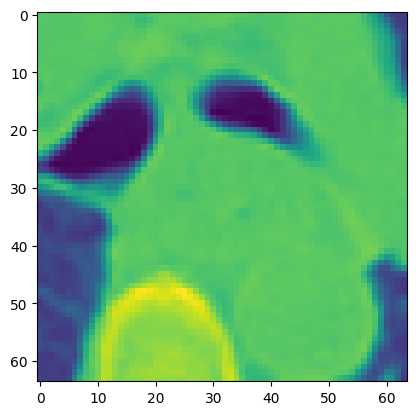

./testnumpy/196708.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/186938/Pre/RS.1.2.246.352.205.5365707167290685330.6312586731870589612.dcm
Structure: gtv_1 found


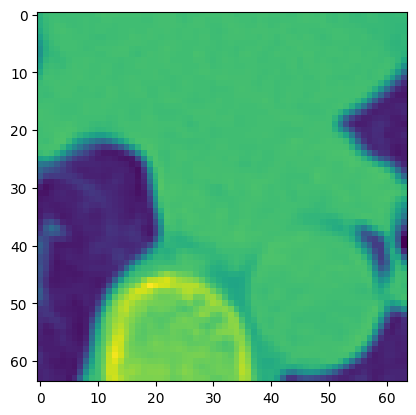

./testnumpy/186938.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/240630/Pre/RS.1.2.246.352.205.5446387734320485768.1064229149072175545.dcm
Structure: gtv_1 found


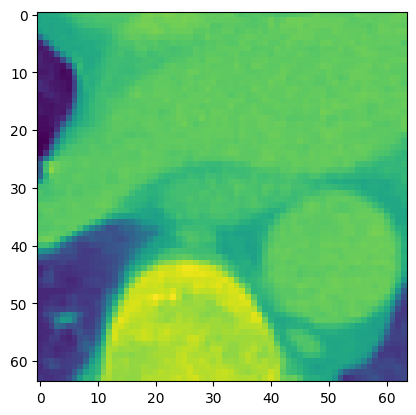

./testnumpy/240630.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/257025/Pre/RS.1.2.246.352.205.5436845919430748315.13943077369290980502.dcm
Structure: gtv_1 found


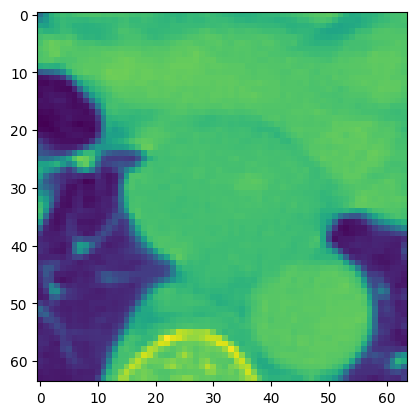

./testnumpy/257025.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/164483/Pre/RS.1.2.246.352.205.5493787945489841541.11822689162497293977.dcm
Structure: gtv_1 found


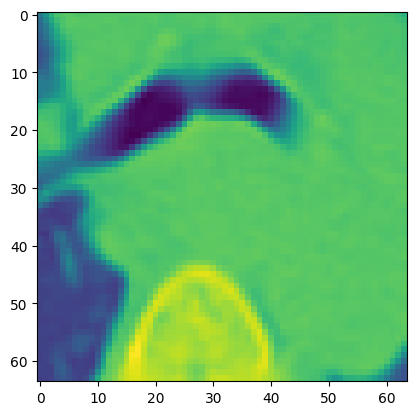

./testnumpy/164483.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/249740/Pre/RS.1.2.246.352.205.5179018938552690178.17744315254194408104.dcm
Structure: gtv_1 found


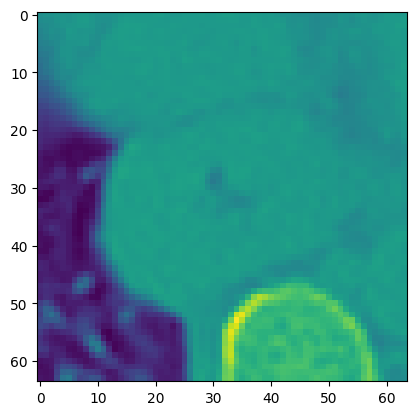

./testnumpy/249740.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/213738/Pre/RS.1.2.246.352.205.5455751837083918829.13514518306930694320.dcm
Structure: gtv_1 found


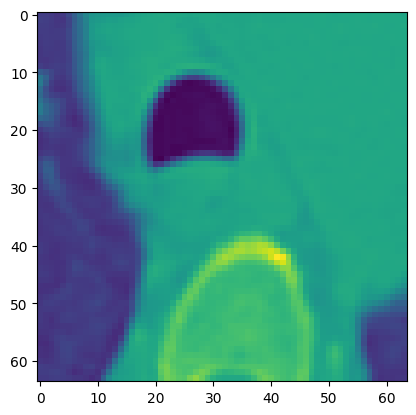

./testnumpy/213738.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/135226/Pre/RS.1.2.246.352.205.5344064656383272249.14597290830391536542.dcm
Structure: gtv_1 found


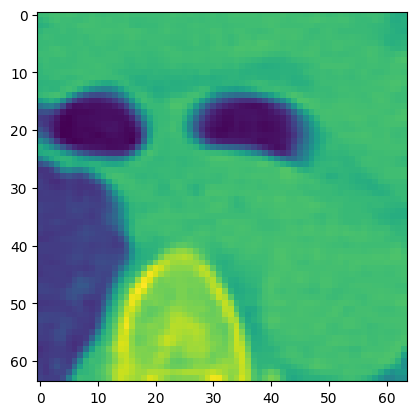

./testnumpy/135226.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/188695/Pre/RS.1.2.246.352.205.5010915586226400657.9857293429788409999.dcm
Structure: gtv_1 found


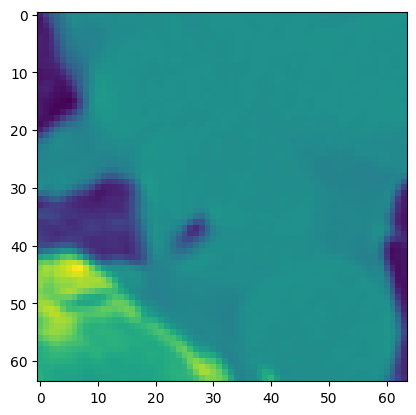

./testnumpy/188695.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/203559/Pre/RS.1.2.246.352.205.5444660333655921882.11267619999830661545.dcm
Structure: gtv_1 found


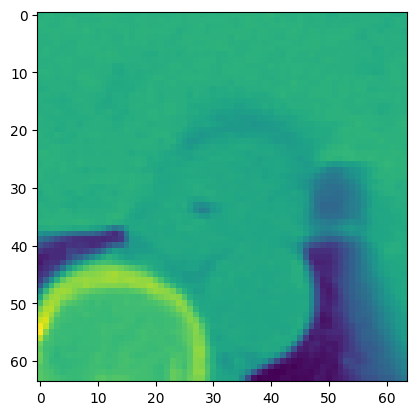

./testnumpy/203559.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/168612/Pre/RS.1.2.246.352.205.5558937214568597557.4941837459508733831.dcm
Structure: gtv_1 found


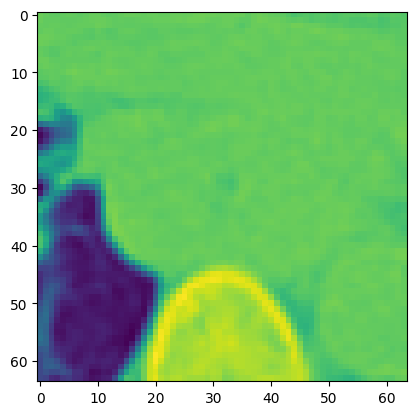

./testnumpy/168612.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/261388/Pre/RS.1.2.246.352.205.4968644449604499083.11627928557810546060.dcm
Structure: gtv_1 found


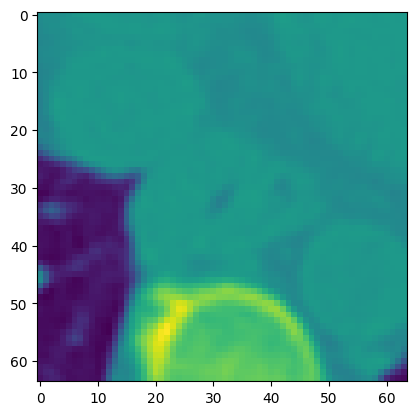

./testnumpy/261388.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/213936/Pre/RS.1.2.246.352.205.5162694080782261585.1757333148311893908.dcm
Structure: gtv_1 found


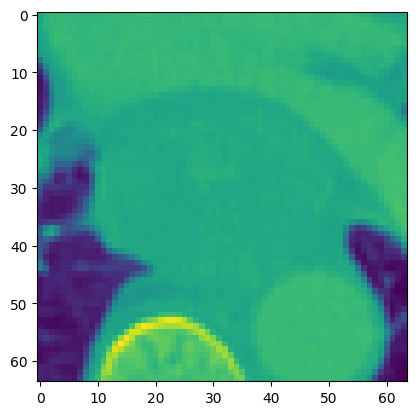

./testnumpy/213936.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/169596/Pre_CT/RS.1.2.246.352.205.5431150038721940417.5113983668511906473.dcm
Structure: gtv__1 found


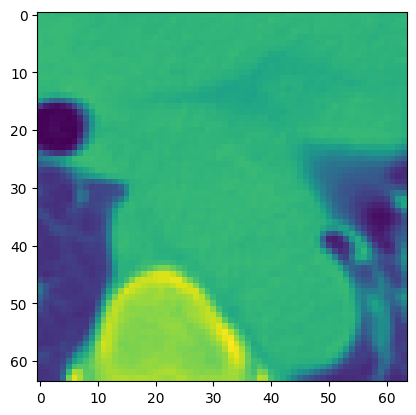

./testnumpy/169596.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/188261/Pre/RS.1.2.246.352.205.5404926615484734296.14947863611197949602.dcm
Structure: gtv_1 found


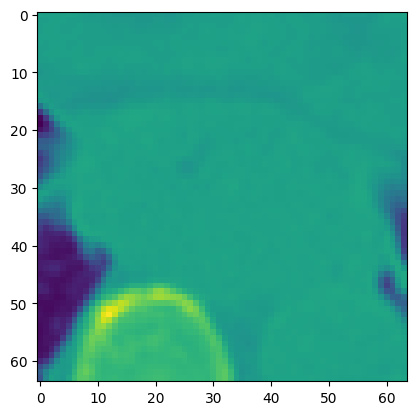

./testnumpy/188261.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/136405/Pre/RS.1.2.246.352.205.5375006840152713298.17229635384443234189.dcm
Structure: gtv_1 found


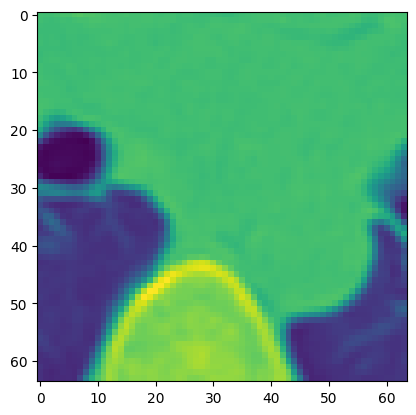

./testnumpy/136405.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/132600/Pre/RS.1.2.246.352.205.5665345961853774569.10092301060595105418.dcm
Structure: gtv_1 found


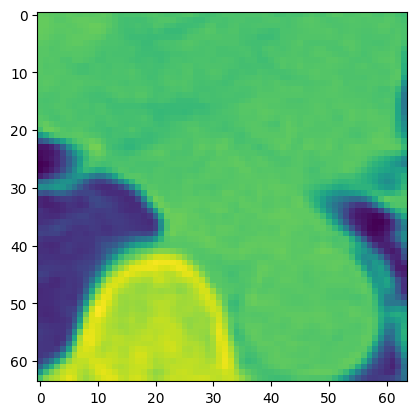

./testnumpy/132600.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/131819/Pre/RS.1.2.246.352.71.4.513149349817.225081.20200204111258.dcm
Structure: gtv_1 found


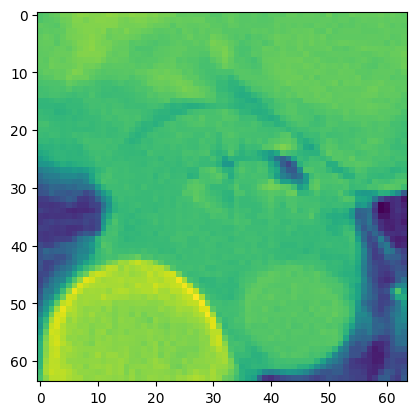

./testnumpy/131819.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/232476/Pre/RS.1.2.246.352.205.5721411802000538707.12242398923090209953.dcm
Structure: gtv_1 found


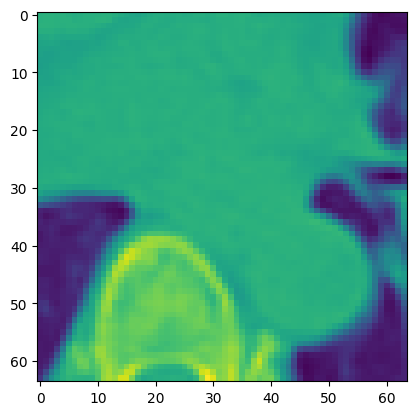

./testnumpy/232476.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/216617/Pre/RS.1.2.246.352.205.4789084117474963649.14548385587815597191.dcm
Structure: gtv_1 found


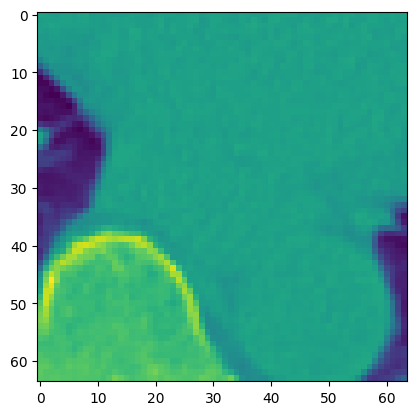

./testnumpy/216617.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/169199/Pre/RS.1.2.246.352.205.5694616711900250261.11717384909361153425.dcm
Structure: gtv_1 found


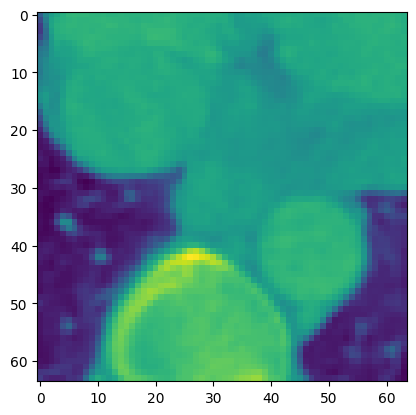

./testnumpy/169199.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/274094/Pre/RS.1.2.246.352.205.4715163386124370002.12234277162811625105.dcm
Structure: gtv_1 found


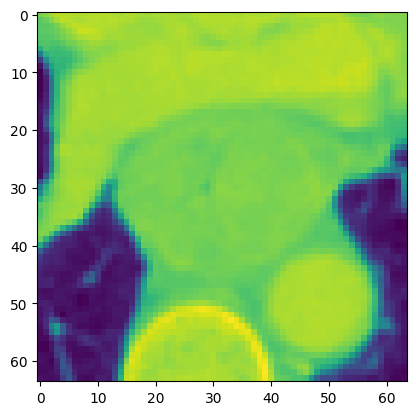

./testnumpy/274094.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/252936/Pre/RS.1.2.246.352.205.5285517285203007248.9513572653796027285.dcm
Structure: gtv_1 found


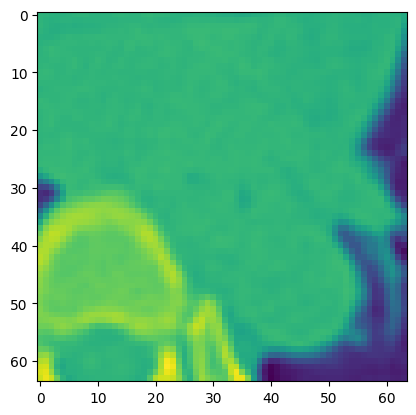

./testnumpy/252936.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/200582/Pre/RS.1.2.246.352.205.5228074549523924200.11298887291683004823.dcm
Structure: gtv_1 found


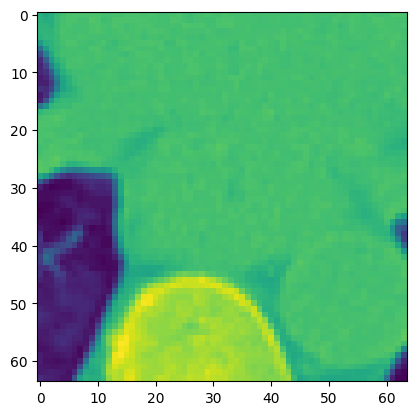

./testnumpy/200582.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/190728/Pre/RS.1.2.246.352.205.5387921698641401998.15134344169321036726.dcm
Structure: gtv__1 found


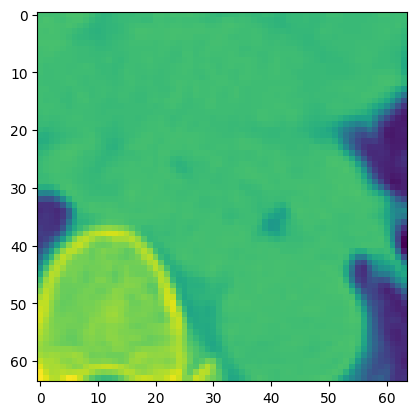

./testnumpy/190728.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/158751/Pre/RS.1.2.246.352.205.5344099722445943697.17307719504858863751.dcm
Structure: gtv_1 found


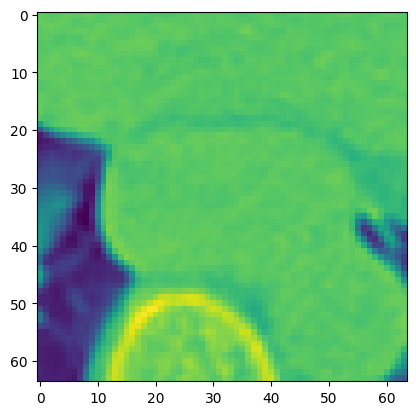

./testnumpy/158751.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/172495/Pre/RS.1.2.246.352.205.5441695457558460550.13225239766623129018.dcm
Structure: gtv_1 found


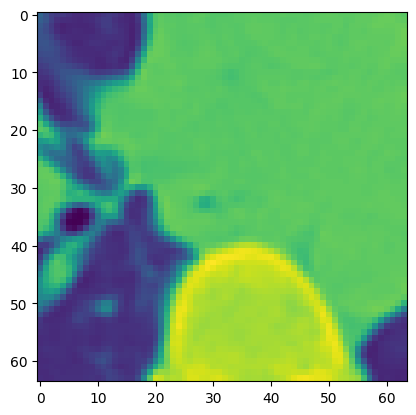

./testnumpy/172495.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/198587/Pre/RS.1.2.246.352.205.5323989405269402115.11585896467111788212.dcm
Structure: gtv_1 found


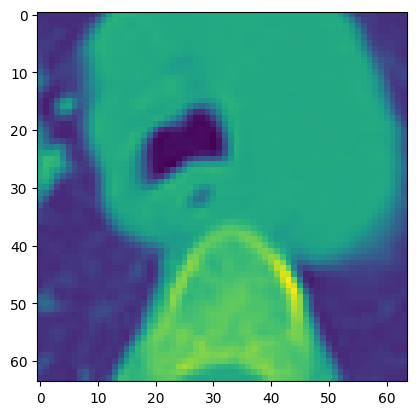

./testnumpy/198587.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/195092/Pre/RS.1.2.246.352.205.5605033522399942250.16948823249823003814.dcm
Structure: gtv_1 found


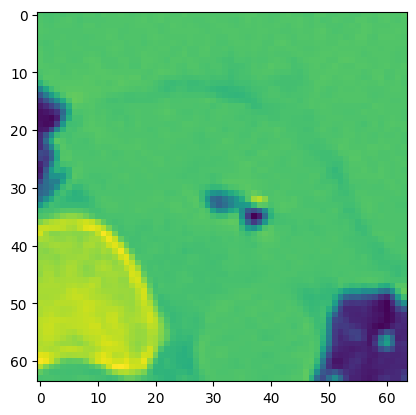

./testnumpy/195092.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/122772/Pre_CT_10mm/RS.1.2.246.352.71.4.513149349817.233691.20200513000025.dcm
Structure: gtv_1 found


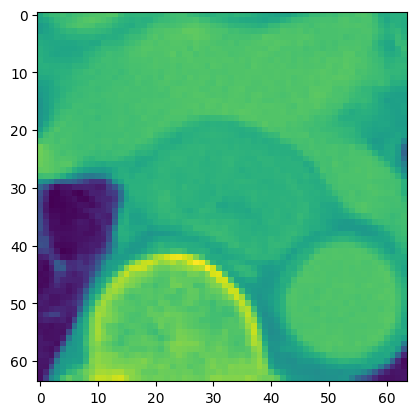

./testnumpy/122772.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/147547/Pre/RS.1.2.246.352.205.5173760928407420299.14761038472869531027.dcm
Structure: gtv_1 found


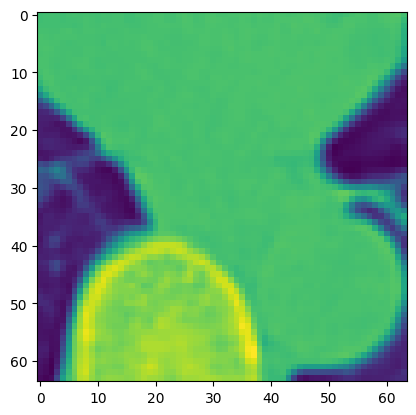

./testnumpy/147547.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/208406/Pre/RS.1.2.246.352.205.5401920473229387057.4012408491764165270.dcm
Structure: gtv_1 found


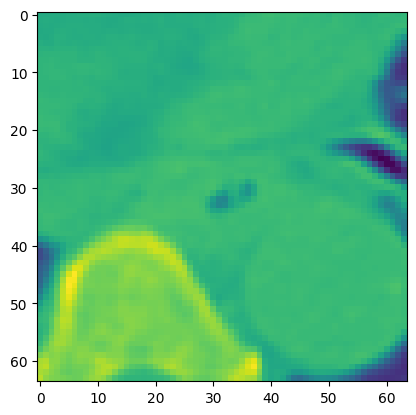

./testnumpy/208406.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/149026/Pre/RS.1.2.246.352.205.4981547384589047551.11192846917231337350.dcm
Structure: gtv__1 found


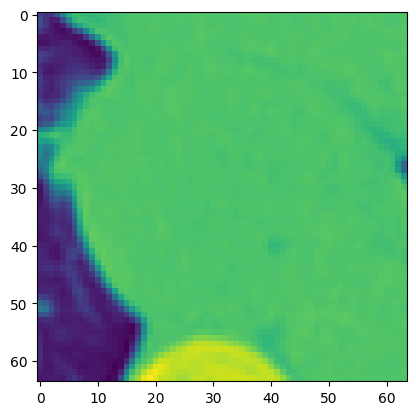

./testnumpy/149026.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/151227/Pre/RS.1.2.246.352.205.5685877530408856870.9191455328305072316.dcm
Structure: gtv__1 found


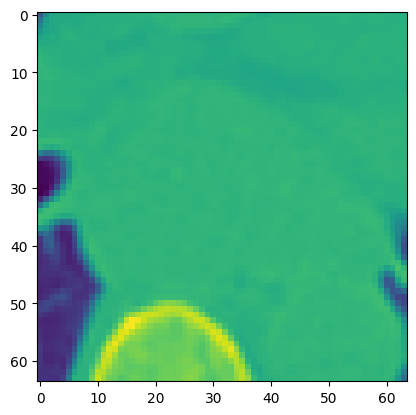

./testnumpy/151227.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/241607/Pre/RS.1.2.246.352.205.5735629491686258081.11897253440126631553.dcm
Structure: gtv_1 found


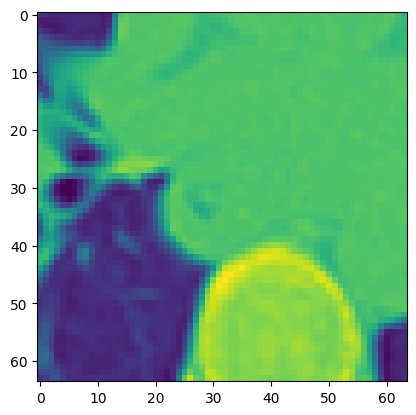

./testnumpy/241607.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/256827/Pre_CT_Planning/RS.1.2.246.352.205.5441716410010464210.144569876435655050.dcm
Structure: gtv_1 found


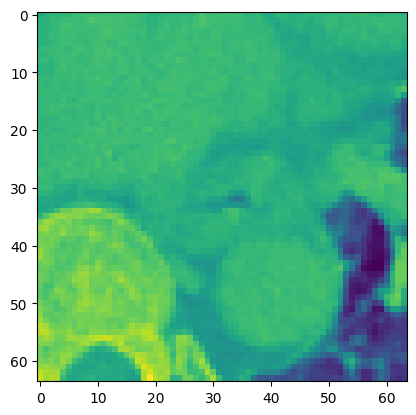

./testnumpy/256827.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/264582/Pre/RS.1.2.246.352.205.5403719789675573565.17233573874245238661.dcm
Structure: gtv_1 found


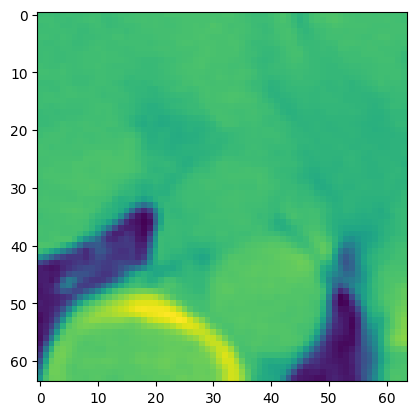

./testnumpy/264582.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/263337/Pre/RS.1.2.246.352.205.5733504380785633108.17971970632498588329.dcm
Structure: gtv_1 found


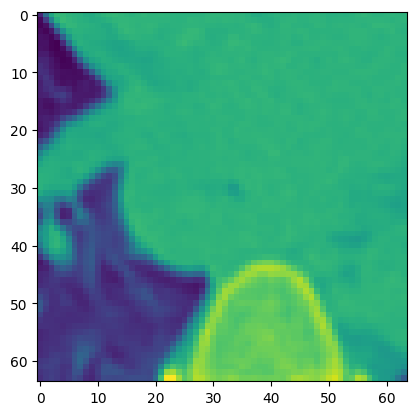

./testnumpy/263337.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/169646/Pre/RS.1.2.246.352.205.5299475005814421245.14037157595087616182.dcm
Structure: gtv_1 found


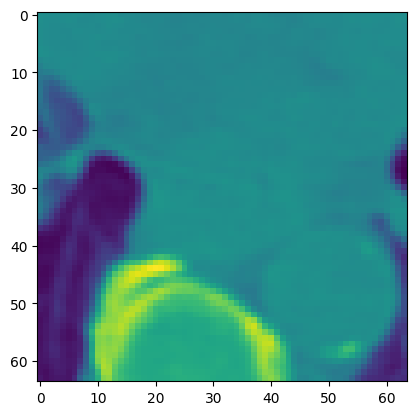

./testnumpy/169646.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/265296/Pre/RS.1.2.246.352.205.5459707574735479976.10906551191389938832.dcm
Structure: gtv_1 found


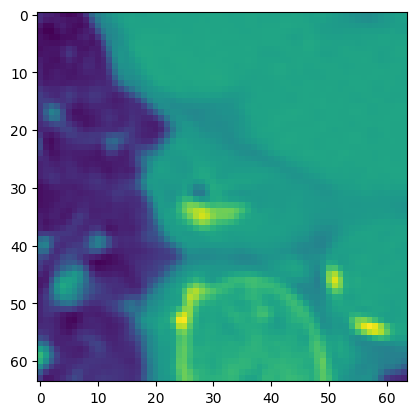

./testnumpy/265296.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/174556/Pre/RS.1.2.246.352.205.5262114332097279094.13812133402396380316.dcm
Structure: gtv_1 found


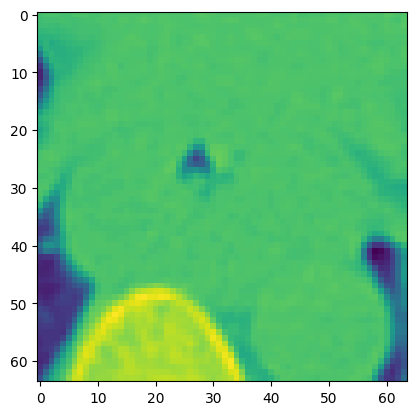

./testnumpy/174556.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/250176/Pre/RS.1.2.246.352.205.5274709346496143431.3029983035366954671.dcm
Structure: gtv_1 found


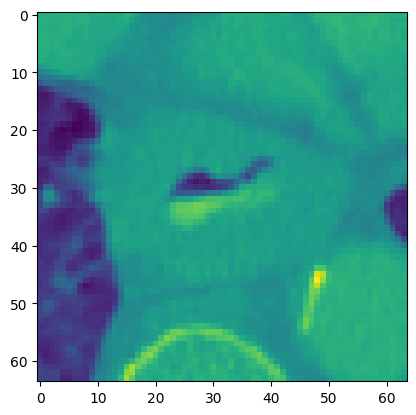

./testnumpy/250176.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/222931/Pre/RS.1.2.246.352.205.5658406394661488260.2924294979604010626.dcm
Structure: gtv_1 found


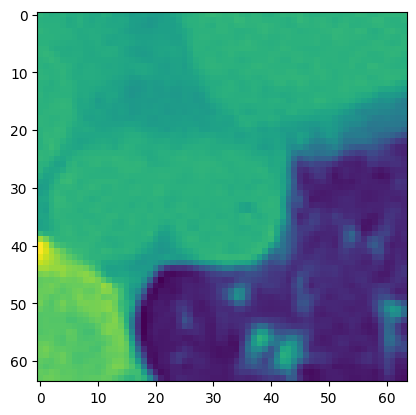

./testnumpy/222931.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/226339/Pre/RS.1.2.246.352.205.5227287098629331657.3565490605893463195.dcm
Structure: gtv_1 found


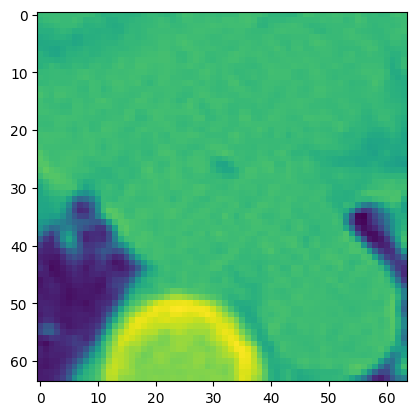

./testnumpy/226339.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/174799/Pre/RS.1.2.246.352.205.4773727050961645320.12847793454515040153.dcm
Structure: gtv_1 found


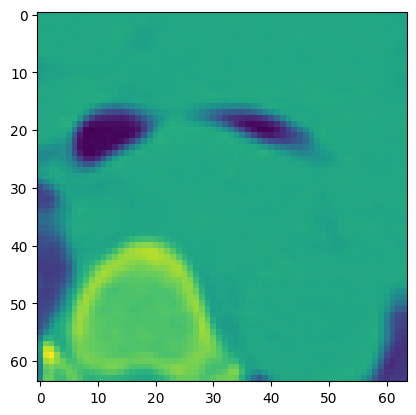

./testnumpy/174799.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/138086/Pre/RS.1.2.246.352.205.5710166234464987807.7359662024194797996.dcm
Structure: gtv_1 found


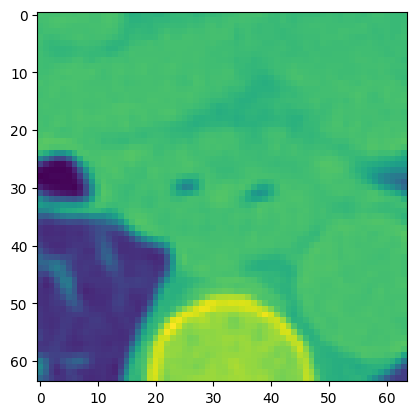

./testnumpy/138086.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/138043/Pre/RS.1.2.246.352.205.5237881293218441724.2024704427225576338.dcm
Structure: gtv__1 found


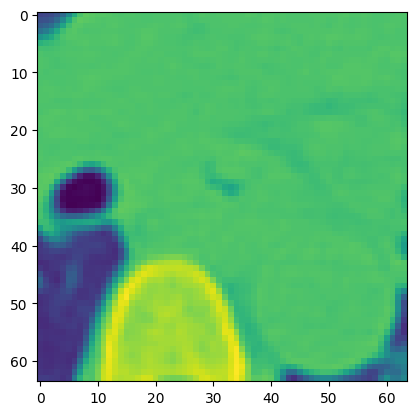

./testnumpy/138043.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/173171/Pre/RS.1.2.246.352.205.4680951476489324718.3684355603102901639.dcm
Structure: gtv_1 found


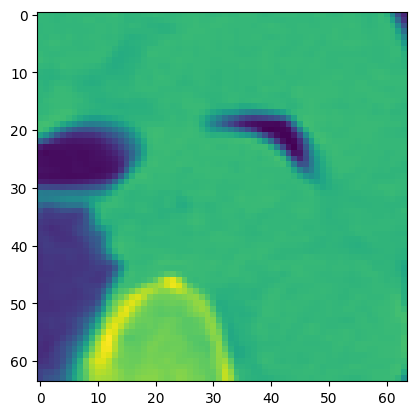

./testnumpy/173171.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/128813/Pre/RS.1.2.246.352.205.5010409493181278125.12611604423849786552.dcm
Structure: gtv_1 found


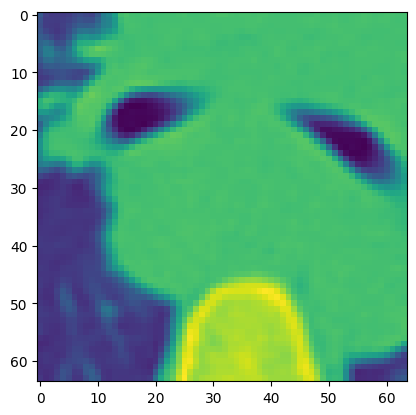

./testnumpy/128813.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Post DICOM Datasets/173972/Pre/RS.1.2.246.352.205.5344614852010921006.16540142946527810467.dcm
Structure: gtv_1 found


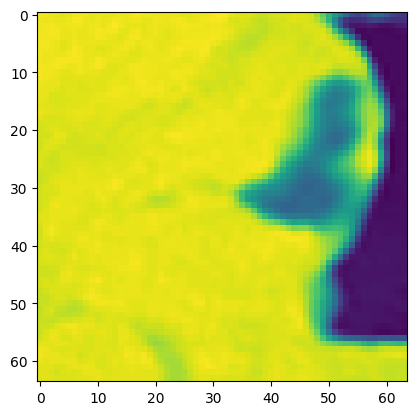

./testnumpy/173972.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/166845/Pre_CT/RS.1.2.246.352.71.4.513149349817.224030.20200125160623.dcm
Structure: gtv_1 found


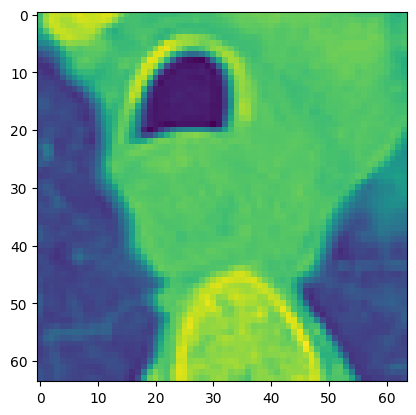

./testnumpy/166845.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/218812/Pre/RS.1.2.246.352.205.5033841363505406981.16132828934440040374.dcm
Structure: gtv_1 found


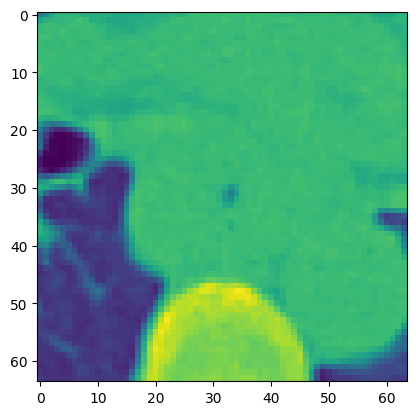

./testnumpy/218812.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/248759/Pre/RS.1.2.246.352.205.5748623856738257528.17657509035798068645.dcm
Structure: gtv_1 found


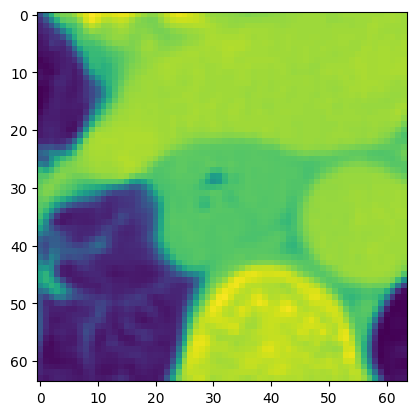

./testnumpy/248759.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/172015/Pre/RS.1.2.246.352.205.4736618838521010059.13117147688140341133.dcm
Structure: gtv__1 found


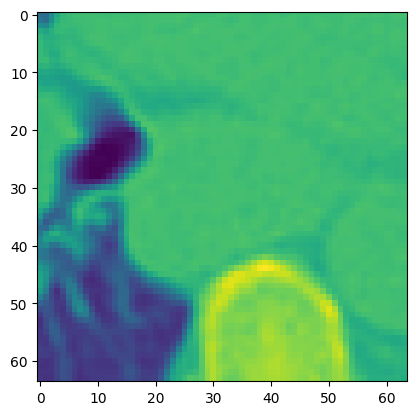

./testnumpy/172015.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/175609/Pre/RS.1.2.246.352.205.4625049730137198151.9049571879456036505.dcm
Structure: gtv__1 found


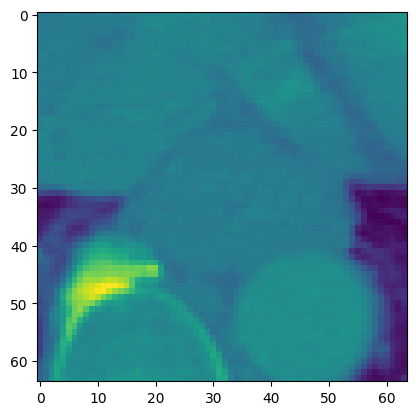

./testnumpy/175609.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/163084/Pre_CT/RS.1.2.246.352.205.4772984957724205792.5536557910778373539.dcm
Structure: gtv_1 found


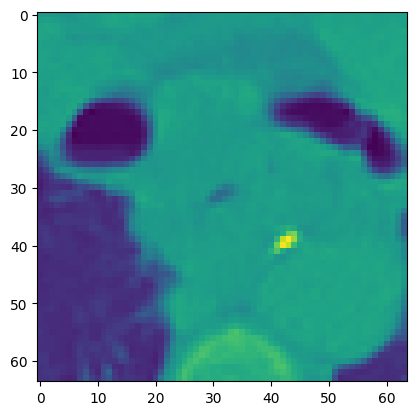

./testnumpy/163084.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/207311/Pre/RS.1.2.246.352.205.5248545782475176531.12808805775807591051.dcm
Structure: gtv_1 found


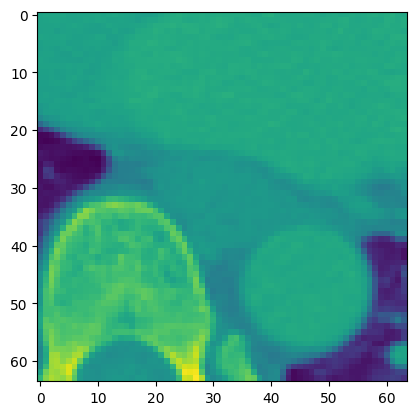

./testnumpy/207311.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/177422/Pre/RS.1.2.246.352.205.4830154319515953170.15470941329413767092.dcm
Structure: gtv__1 found


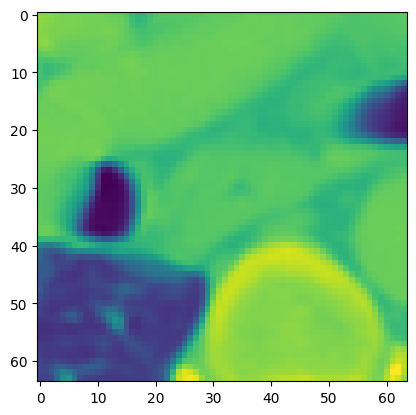

./testnumpy/177422.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/266335/Pre/RS.1.2.246.352.205.4936466974415554451.12311800613165797796.dcm
Structure: gtv_1 found


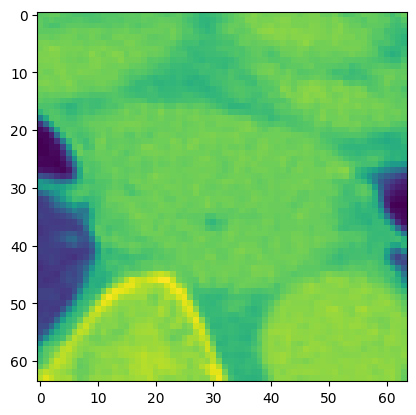

./testnumpy/266335.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/139242/Pre/RS.1.2.246.352.205.5504752844388184792.17581295996397301693.dcm
Structure: gtv__1 found


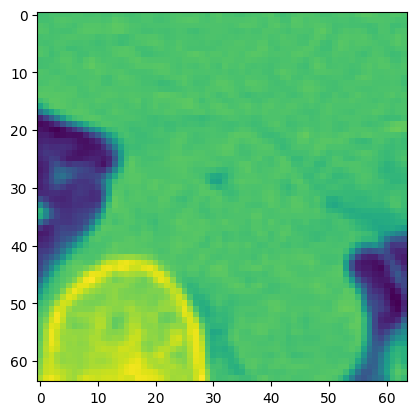

./testnumpy/139242.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/266109/Pre/RS.1.2.246.352.205.5134136385425287236.13805650472514397838.dcm
Structure: gtv_1 found


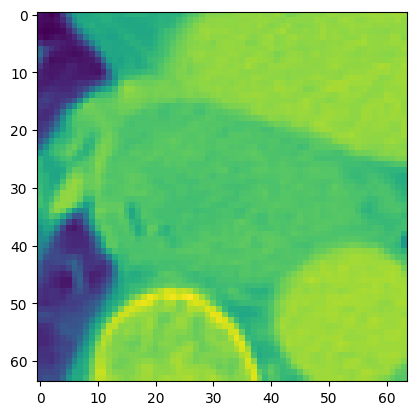

./testnumpy/266109.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/182932/Pre/RS.1.2.246.352.205.5458067839178047799.6463384485809560979.dcm
Structure: gtv_1 found


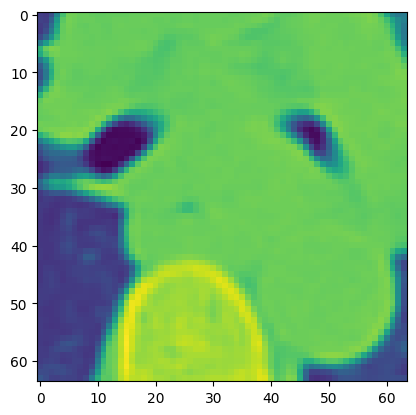

./testnumpy/182932.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/170360/Pre/RS.1.2.246.352.205.4875394934962432860.14250262025281251989.dcm
Structure: gtv_1 found


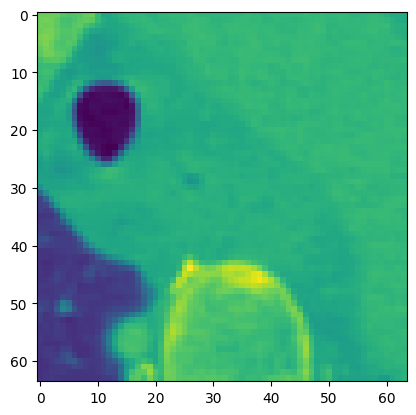

./testnumpy/170360.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/215315/Pre/RS.1.2.246.352.205.5422126267369848589.13553794672792173443.dcm
Structure: gtv_1 found


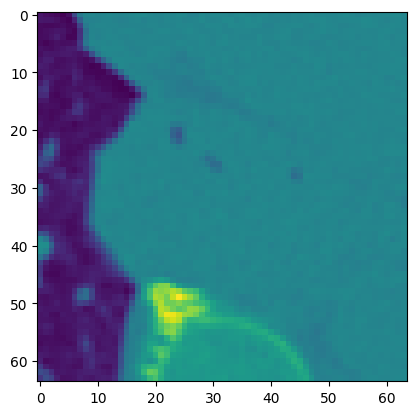

./testnumpy/215315.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/199083/Pre/RS.1.2.246.352.205.5693475028878252398.2234978705940191666.dcm
Structure: gtv__1 found


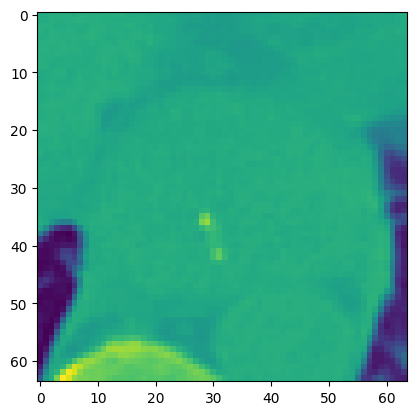

./testnumpy/199083.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/166994/Pre/RS.1.2.246.352.205.5097243327044390203.1681628528569775020.dcm
Structure: gtv_1 found


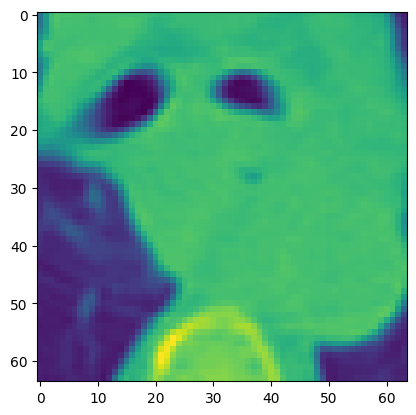

./testnumpy/166994.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/220373/Pre/RS.1.2.246.352.205.4960936571672681907.7162027026816955014.dcm
Structure: gtv_1 found


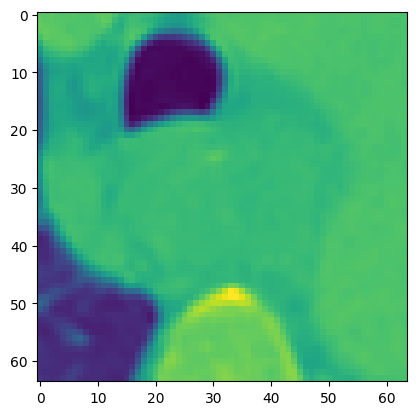

./testnumpy/220373.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/229064/Pre/RS.1.2.246.352.205.4930755878116718845.9899698651987095968.dcm
Structure: gtv_1 found


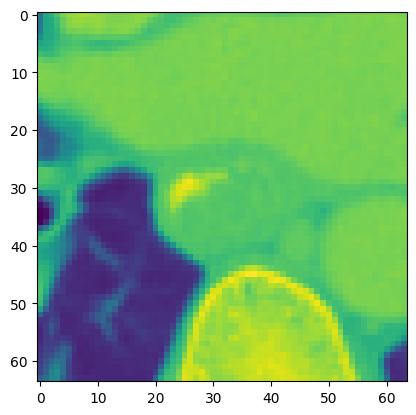

./testnumpy/229064.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/189117/Pre/RS.1.2.246.352.205.5302932357339798796.17649034924640176530.dcm
Structure: gtv_1 found


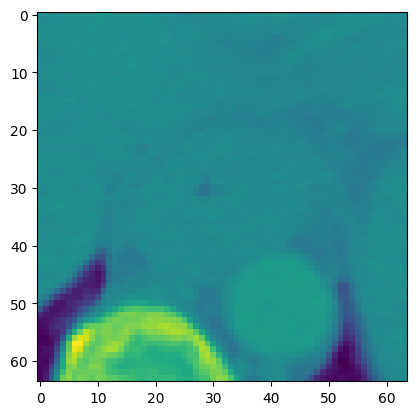

./testnumpy/189117.npy Cropped Successfully
../image_data/QARC_25092022/QARC Pre-Only DICOM Datasets/268740/Pre/RS.1.2.246.352.205.5543812460918104049.15582605099330040983.dcm
Structure: gtv_1 found


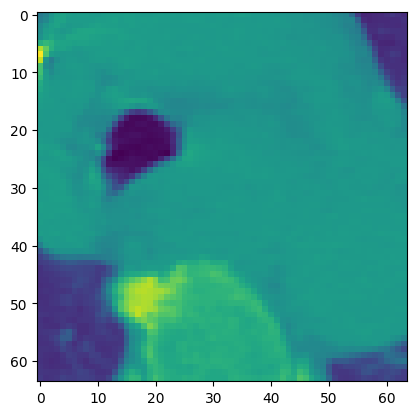

./testnumpy/268740.npy Cropped Successfully


In [34]:
done, notdone = convert(pre_path)

In [35]:
postdir = "../image_data/post_numpy/"
predir = "../image_data/pre_numpy_new/"

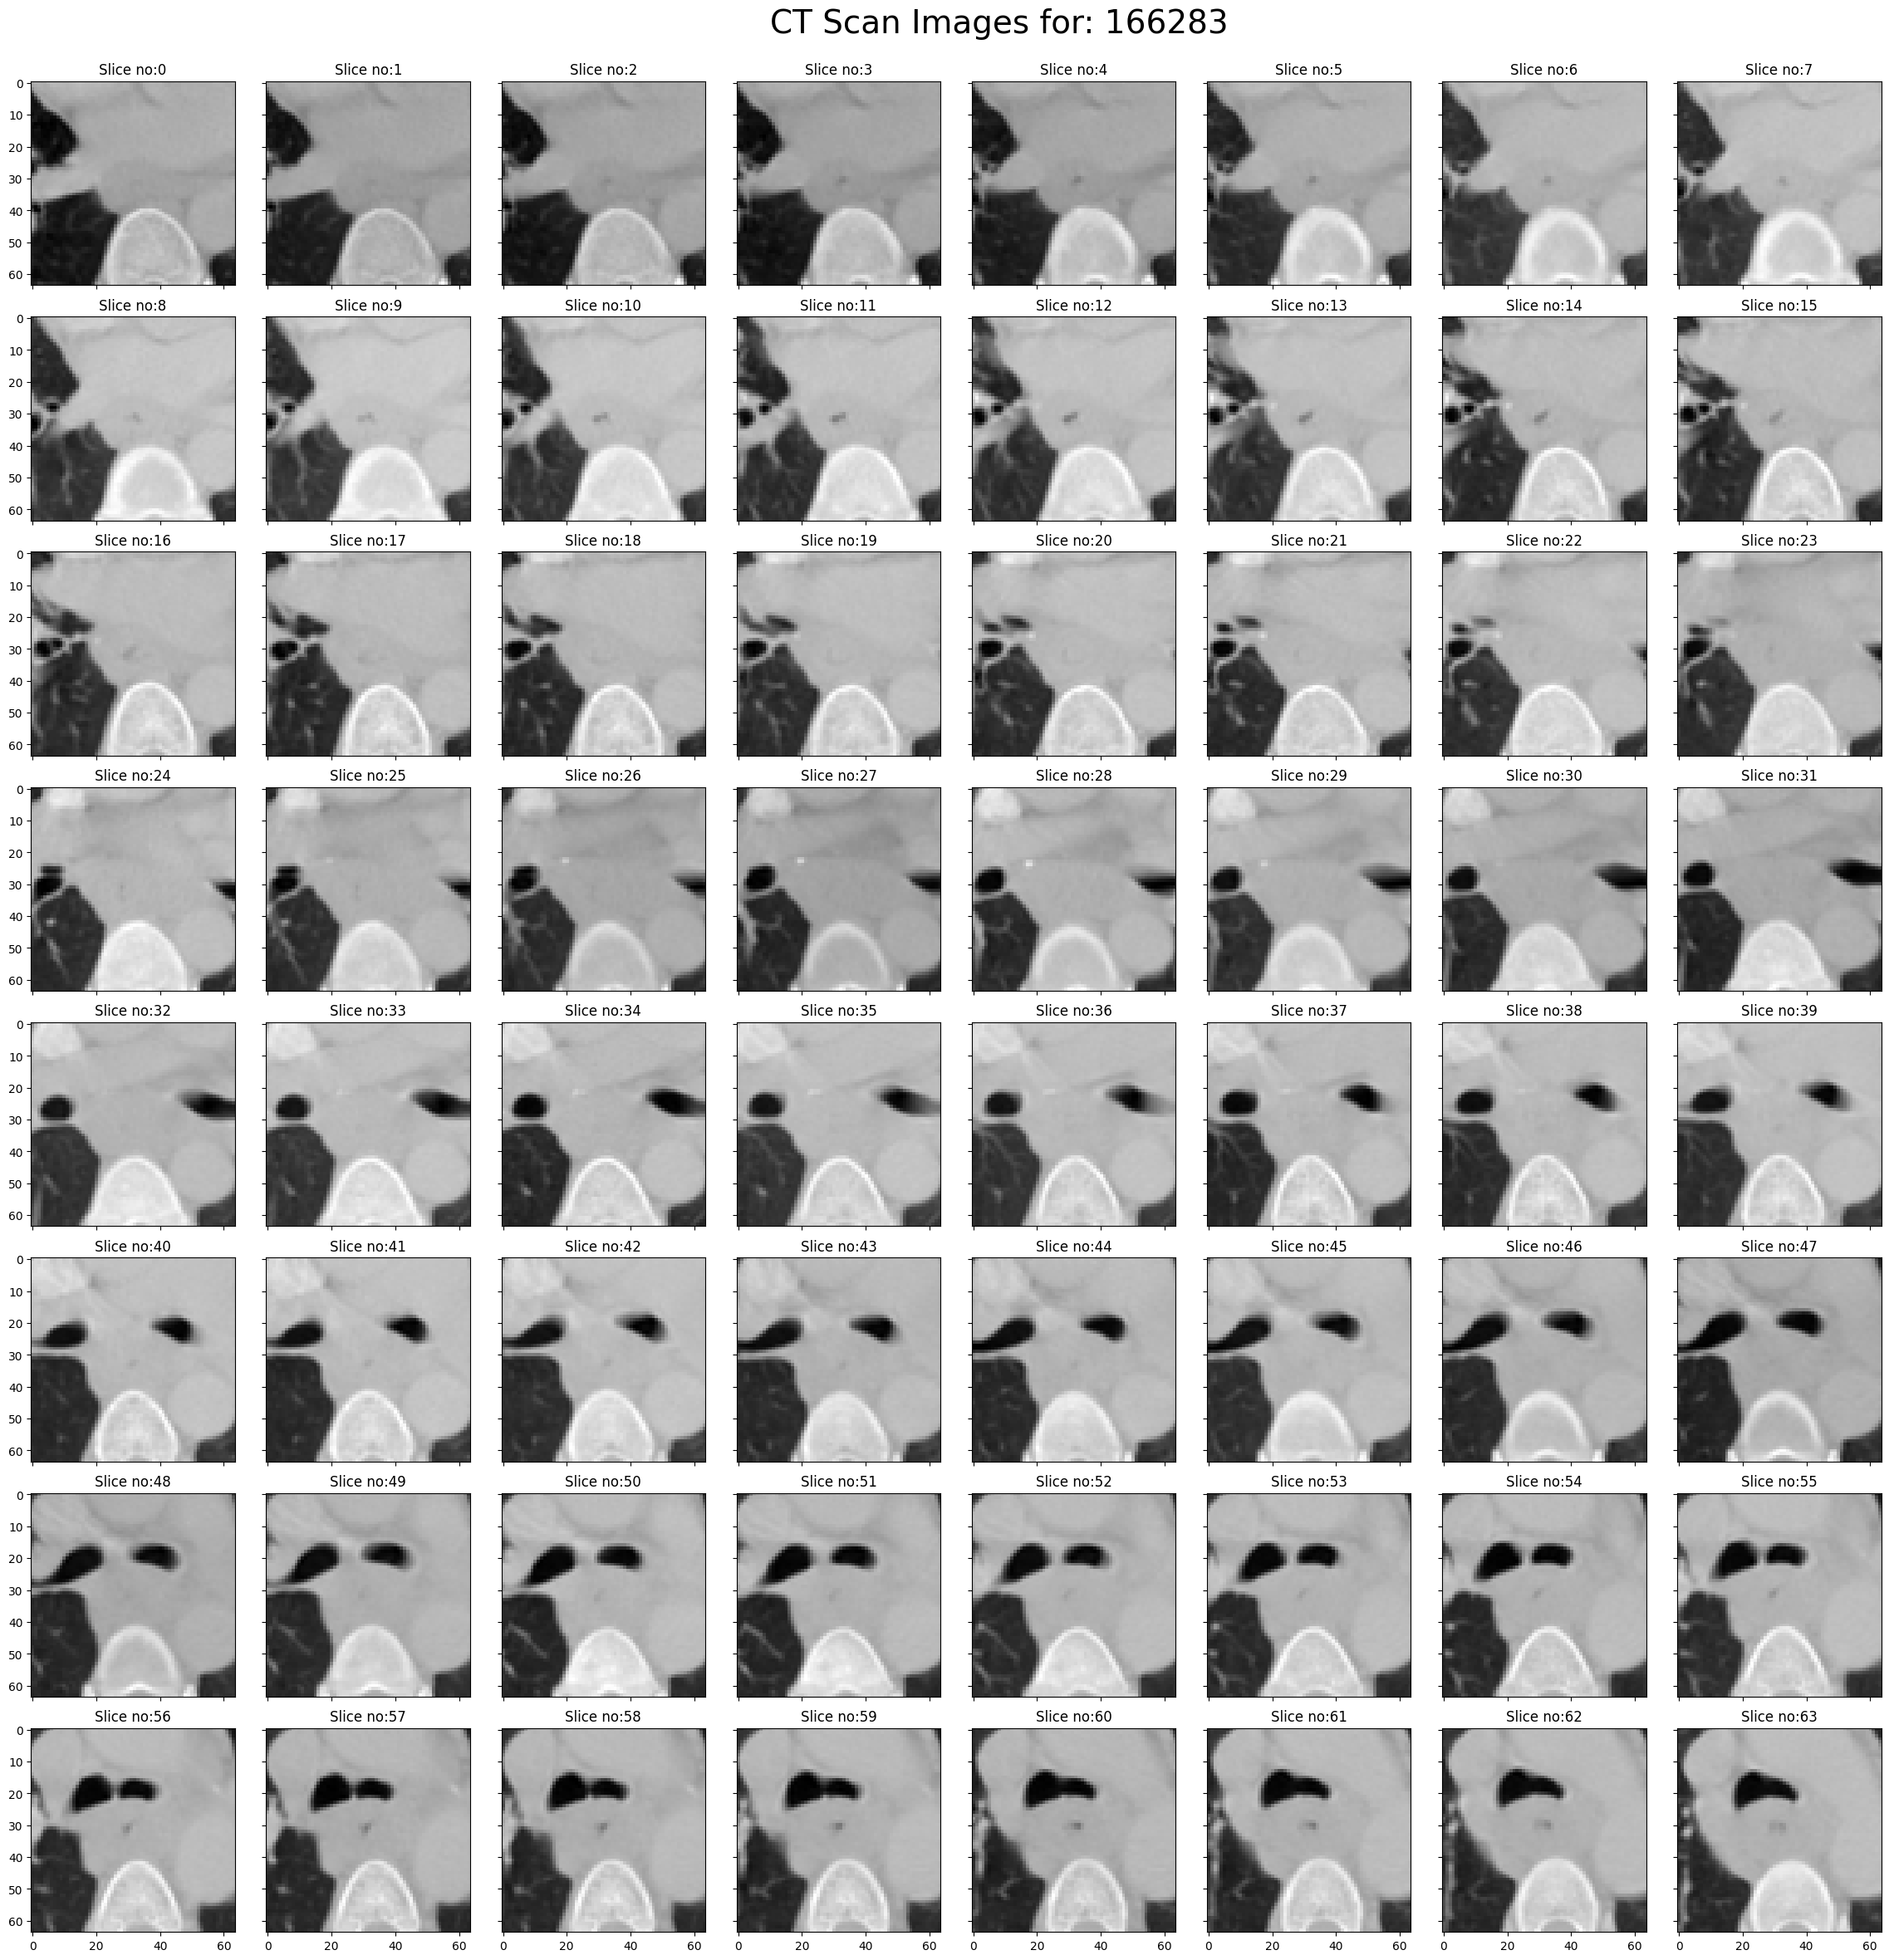

In [45]:
utilities.check_numpy_images(166283,img_path=predir,rotate=False)

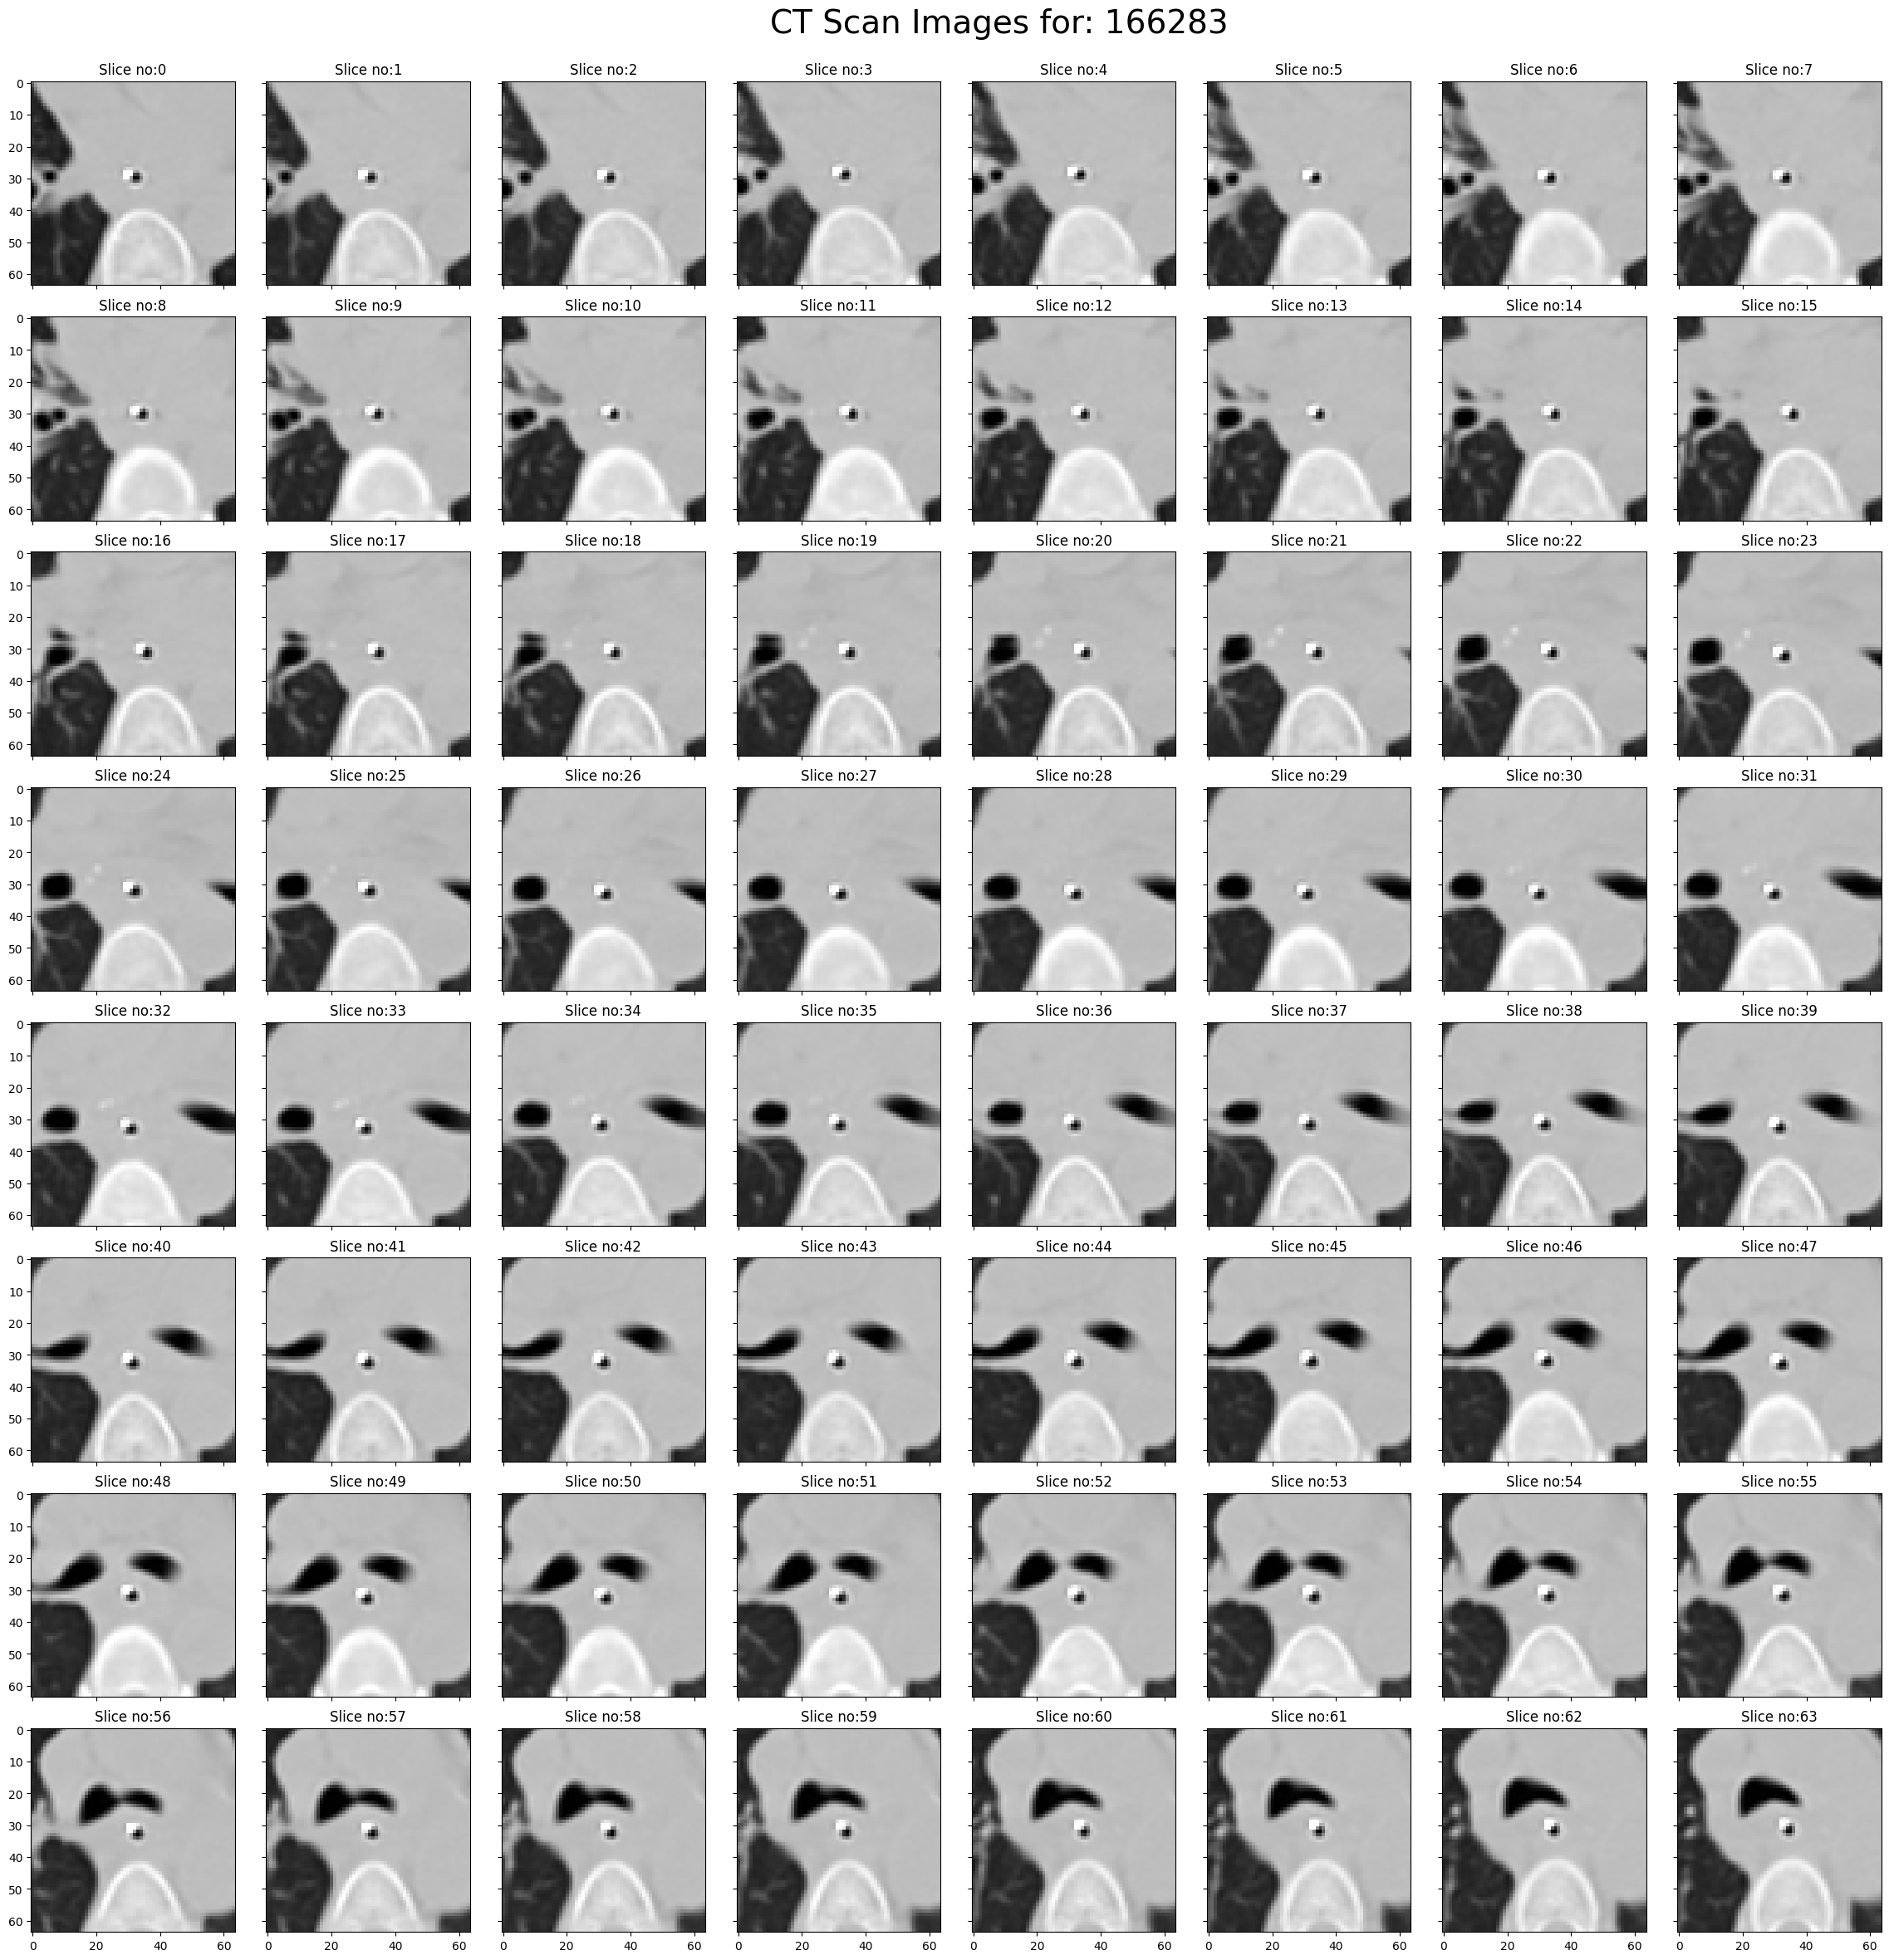

In [46]:
utilities.check_numpy_images(166283,img_path=postdir,rotate=False)

In [ ]:
img = np.load('./testnumpy/128151.npy')

In [ ]:
plt.imshow(img[:,:,32], cmap="gray")

In [ ]:
img.max()

# Check Problem patient

In [ ]:
IDs = []
for k in range(len(pathlist)):
    for i in os.listdir(pathlist[k]):
        if 'RS' in i:
            IDs.append(int(i[3:9]))

In [ ]:
IDs.sort()

In [ ]:
import os
#from utilities import preprocessDICOM
from utilities import utilities
import numpy as np

In [ ]:
outputdir = '/Users/chufalsmacbookpro/Google Drive/finaldata/Eso_NoZeroCentered_DifferentSizes_npyImages/Eso_Numpy_NoZeroCent96x96x96_211/'

In [ ]:
#ID = IDs[0]
utilities.check_numpy_images(270102,img_path=outputdir,rotate=False)

# Issues with Scans

- Oral Contrast - 129143, 153203, 257025, 213738, 198750, 132300
- Oral Contrast - 146062, 150224, 231203, 213936, 199083, 190037, 184249,
- Problem Scan  - 205047

In [ ]:
imgdatamax = {}
imgdatamin = {}
for i in os.listdir(outputdir):
    img_tmp = np.load(os.path.join(outputdir,i))
    imgdatamax[i] = img_tmp.max()
    imgdatamin[i] = img_tmp.min()

In [ ]:
for key,value in imgdatamax.items():
    if value < 1:
        print(key[:-4], value)

In [ ]:
for key,value in imgdatamin.items():
    if value > 0:
        print(key[:-4], value)

### Directory - Eso_Numpy_NoZeroCent64x64x64_211

#### Files:Max

- 270102: 0.842
- 205047: 0.985
- 174978: 0.992
- 173972: 0.994
- 125005: 0.791

#### Files:Min

- 270102: 0.317
- 185521: 0.107
- 139242: 0.118
- 273913: 0.097
- 167676: 0.137
- 207311: 0.145
- 184249: 0.090
- 157355: 0.136
- 174978: 0.11
- 233445: 0.095
- 209597: 0.093
